# Abstract

<body>
<p>
Do you want to GET RICH QUICK using data science and machine learning to predict stock prices?  Going this route has many heartaches, and decision trees to traverse such as.
    <ul>
        <li>Drop some sparse columns, or fill the missing data with 0?</li>  <li>Do you <a href="https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f">one hot encode</a> an analyst saying "BUY", "HOLD", or map numerical values to each of the given features?</li> <li>What if there are irregularities in the price data you have, how do you fix them?</li></ul>  All of these and more are valid questions we had to answer, and have a direct effect on the predictions of our networks.  If in the end our predictions do gain profits we will become <a href="https://cryptohustle.com/market-makers-vs-market-movers/#:~:text=Market%20movers%20are%20traders%20or,that%20can%20influence%20price%20action.">market movers</a>, and eventually the market will work out the methods we are using to predict.</p>
<p>
Our data was scraped using Selenium from an investment firm consisting of analyst opinions, performance statistics, prices, and company information for 7000+ stock symbols from August, 9th of 2019 to present.   Although after cleaning our data, and dropping irregularities we end with roughly 2000 symbols.</p>

<p>We are predicting <a href="https://towardsdatascience.com/how-to-predict-a-time-series-part-1-6d7eb182b540">time series data</a>, so we have to define things such as the number of days to predict the next with.  The data is then transformed into multiple matrices of X_data correlating to y_targets.  The X_data being all the data from n day(s) before, and the y_targets being the data we are trying to predict. If one wanted to know the information two days ahead they would have to predict all the data for one day then use the predicted data to predict the next, or structure the data in such a way where one day is being used to predict two.</p>
    
<p>Our first networks had infinite loss due to predicting everything as 0, so we had to devise a method for creating the best network to use on the data.  There are few `plug-and-play` methods for tuning neural networks, and especially tuning Time Series predicting networks.  The method we did find was a Hyperband from <a href="https://keras-team.github.io/keras-tuner/">kerastuner</a>.  The Hyperband takes a build function and inside of the build function one can use a Hyperband choice function which reports back to the Hyperband what effect a given quotient had on the validation loss of the network.  Our <b>NetworkTuner</b> can tune items such as:
<ul>
    <li>n_input (number of days to use in the prediction)</li>
    <li>Columns (which of the given columns to use in the prediction)</li>
    <li>Scale or not to scale the data between 0 and 1</li>
    <li>How many neurons to use in any given layer</li>
    <li>How much regularization if any to use, and which type</li>
    </ul>
</p>
<p>
    With the Hyperband we also developed a <a href="https://scikit-learn.org/stable/modules/cross_validation.html">cross validation</a> method, as kerastuner does not supply one out of the bag for time series.  Cross validation ensures that the parameters are not being tuned solely for one set of testing data.  K validation sets are also held back throughout the tuning process to test the network at the end of tuning.</p>
</body>

# Predicting Stock data with an LSTM Network

* Student name: Sam Stoltenberg
* Student pace: full time
* Scheduled project review date/time: 01/05/2020 | 3:30PM
* Instructor name: James Irving
* Blog post URL: Coming soon...

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Predicting-Stock-data-with-an-LSTM-Network" data-toc-modified-id="Predicting-Stock-data-with-an-LSTM-Network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predicting Stock data with an LSTM Network</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Style" data-toc-modified-id="Style-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Style</a></span></li></ul></li><li><span><a href="#Imports-and-Data" data-toc-modified-id="Imports-and-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imports and Data</a></span><ul class="toc-item"><li><span><a href="#Imports-for-reproducibility" data-toc-modified-id="Imports-for-reproducibility-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Imports for reproducibility</a></span></li><li><span><a href="#Custom-imports" data-toc-modified-id="Custom-imports-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Custom imports</a></span><ul class="toc-item"><li><span><a href="#NetworkCreator" data-toc-modified-id="NetworkCreator-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>NetworkCreator</a></span></li><li><span><a href="#NetworkBuilder" data-toc-modified-id="NetworkBuilder-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>NetworkBuilder</a></span></li><li><span><a href="#NetworkTuner" data-toc-modified-id="NetworkTuner-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>NetworkTuner</a></span></li></ul></li></ul></li><li><span><a href="#Scrubbing" data-toc-modified-id="Scrubbing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scrubbing</a></span><ul class="toc-item"><li><span><a href="#Loading-in-scrubbed-data" data-toc-modified-id="Loading-in-scrubbed-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Loading in scrubbed data</a></span><ul class="toc-item"><li><span><a href="#Prices" data-toc-modified-id="Prices-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Prices</a></span></li><li><span><a href="#Performance" data-toc-modified-id="Performance-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Performance</a></span></li><li><span><a href="#Penny_Performance" data-toc-modified-id="Penny_Performance-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Penny_Performance</a></span></li><li><span><a href="#Company" data-toc-modified-id="Company-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Company</a></span></li><li><span><a href="#Analyst-Opinions" data-toc-modified-id="Analyst-Opinions-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Analyst Opinions</a></span></li><li><span><a href="#Combined-datasets" data-toc-modified-id="Combined-datasets-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Combined datasets</a></span></li></ul></li></ul></li><li><span><a href="#Scrubbing-data-for-modeling" data-toc-modified-id="Scrubbing-data-for-modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scrubbing data for modeling</a></span><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Preparing the data</a></span><ul class="toc-item"><li><span><a href="#Company" data-toc-modified-id="Company-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Company</a></span></li><li><span><a href="#Performance,-Analyst-and-Prices" data-toc-modified-id="Performance,-Analyst-and-Prices-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Performance, Analyst and Prices</a></span></li><li><span><a href="#Model-dataframes" data-toc-modified-id="Model-dataframes-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Model dataframes</a></span></li></ul></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Head" data-toc-modified-id="Head-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Head</a></span></li><li><span><a href="#Describe" data-toc-modified-id="Describe-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Describe</a></span></li><li><span><a href="#Info" data-toc-modified-id="Info-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Info</a></span></li><li><span><a href="#Other" data-toc-modified-id="Other-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Other</a></span><ul class="toc-item"><li><span><a href="#Quantities" data-toc-modified-id="Quantities-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>Quantities</a></span></li></ul></li><li><span><a href="#Comparing-our-data-to-data-from-Yahoo-Finance" data-toc-modified-id="Comparing-our-data-to-data-from-Yahoo-Finance-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Comparing our data to data from Yahoo Finance</a></span></li><li><span><a href="#AAPL-differences-to-price" data-toc-modified-id="AAPL-differences-to-price-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>AAPL differences to price</a></span><ul class="toc-item"><li><span><a href="#AAPL-plot-against-all-column,-differences" data-toc-modified-id="AAPL-plot-against-all-column,-differences-7.7.1"><span class="toc-item-num">7.7.1&nbsp;&nbsp;</span>AAPL plot against all column, differences</a></span></li></ul></li></ul></li><li><span><a href="#EDA-->-Correlation" data-toc-modified-id="EDA-->-Correlation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>EDA -&gt; Correlation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Functions-and-Checkpoint" data-toc-modified-id="Functions-and-Checkpoint-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>Functions and Checkpoint</a></span></li></ul></li><li><span><a href="#Function-tests" data-toc-modified-id="Function-tests-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Function tests</a></span><ul class="toc-item"><li><span><a href="#split_df_sym_col" data-toc-modified-id="split_df_sym_col-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>split_df_sym_col</a></span></li><li><span><a href="#get_correlation" data-toc-modified-id="get_correlation-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>get_correlation</a></span></li><li><span><a href="#get_correlation_price_shift" data-toc-modified-id="get_correlation_price_shift-8.1.3"><span class="toc-item-num">8.1.3&nbsp;&nbsp;</span>get_correlation_price_shift</a></span></li><li><span><a href="#get_num_correlations_sym" data-toc-modified-id="get_num_correlations_sym-8.1.4"><span class="toc-item-num">8.1.4&nbsp;&nbsp;</span>get_num_correlations_sym</a></span></li></ul></li><li><span><a href="#Make-a-dataframe-with-the-correlations" data-toc-modified-id="Make-a-dataframe-with-the-correlations-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Make a dataframe with the correlations</a></span><ul class="toc-item"><li><span><a href="#Viewing-the-totals-of-the-correlation-dataframe" data-toc-modified-id="Viewing-the-totals-of-the-correlation-dataframe-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Viewing the totals of the correlation dataframe</a></span></li></ul></li><li><span><a href="#Finding-Price-Correlations-One-Day-Shift" data-toc-modified-id="Finding-Price-Correlations-One-Day-Shift-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Finding Price Correlations One Day Shift</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Plotting-with-drop_cols-as-red" data-toc-modified-id="Plotting-with-drop_cols-as-red-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Plotting with drop_cols as red</a></span></li></ul></li><li><span><a href="#Finding-Price-Correlation-Two-Day-Shift" data-toc-modified-id="Finding-Price-Correlation-Two-Day-Shift-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Finding Price Correlation Two Day Shift</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-8.4.1"><span class="toc-item-num">8.4.1&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Plotting-with-drop_cols-as-red-(-Two-day-shift)" data-toc-modified-id="Plotting-with-drop_cols-as-red-(-Two-day-shift)-8.4.2"><span class="toc-item-num">8.4.2&nbsp;&nbsp;</span>Plotting with drop_cols as red ( Two day shift)</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Predicing-one-price-with-single-stock's-data" data-toc-modified-id="Predicing-one-price-with-single-stock's-data-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Predicing one price with single stock's data</a></span><ul class="toc-item"><li><span><a href="#CHECKPOINT" data-toc-modified-id="CHECKPOINT-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>CHECKPOINT</a></span></li><li><span><a href="#Base-model" data-toc-modified-id="Base-model-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Base model</a></span></li><li><span><a href="#Plotting-History-(-Base-model-)" data-toc-modified-id="Plotting-History-(-Base-model-)-9.2.3"><span class="toc-item-num">9.2.3&nbsp;&nbsp;</span>Plotting History ( Base model )</a></span></li><li><span><a href="#Plotting-Predictions-(-Base-model-)" data-toc-modified-id="Plotting-Predictions-(-Base-model-)-9.2.4"><span class="toc-item-num">9.2.4&nbsp;&nbsp;</span>Plotting Predictions ( Base model )</a></span></li><li><span><a href="#Tuned-model" data-toc-modified-id="Tuned-model-9.2.5"><span class="toc-item-num">9.2.5&nbsp;&nbsp;</span>Tuned model</a></span></li><li><span><a href="#Plotting-History" data-toc-modified-id="Plotting-History-9.2.6"><span class="toc-item-num">9.2.6&nbsp;&nbsp;</span>Plotting History</a></span></li><li><span><a href="#Plotting-Predictions" data-toc-modified-id="Plotting-Predictions-9.2.7"><span class="toc-item-num">9.2.7&nbsp;&nbsp;</span>Plotting Predictions</a></span></li><li><span><a href="#Plotting-Classification" data-toc-modified-id="Plotting-Classification-9.2.8"><span class="toc-item-num">9.2.8&nbsp;&nbsp;</span>Plotting Classification</a></span></li><li><span><a href="#Shap-Interpretation" data-toc-modified-id="Shap-Interpretation-9.2.9"><span class="toc-item-num">9.2.9&nbsp;&nbsp;</span>Shap Interpretation</a></span></li><li><span><a href="#Saving-report-and-images" data-toc-modified-id="Saving-report-and-images-9.2.10"><span class="toc-item-num">9.2.10&nbsp;&nbsp;</span>Saving report and images</a></span></li></ul></li><li><span><a href="#Predicting-one-price-with-all-other-prices" data-toc-modified-id="Predicting-one-price-with-all-other-prices-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Predicting one price with all other prices</a></span><ul class="toc-item"><li><span><a href="#Base-model" data-toc-modified-id="Base-model-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>Base model</a></span></li><li><span><a href="#Plotting-History-(-Base-model-)" data-toc-modified-id="Plotting-History-(-Base-model-)-9.3.2"><span class="toc-item-num">9.3.2&nbsp;&nbsp;</span>Plotting History ( Base model )</a></span></li><li><span><a href="#Plotting-Predictions-(-Base-model-)" data-toc-modified-id="Plotting-Predictions-(-Base-model-)-9.3.3"><span class="toc-item-num">9.3.3&nbsp;&nbsp;</span>Plotting Predictions ( Base model )</a></span></li><li><span><a href="#Tuned-model" data-toc-modified-id="Tuned-model-9.3.4"><span class="toc-item-num">9.3.4&nbsp;&nbsp;</span>Tuned model</a></span></li><li><span><a href="#Plotting-History" data-toc-modified-id="Plotting-History-9.3.5"><span class="toc-item-num">9.3.5&nbsp;&nbsp;</span>Plotting History</a></span></li><li><span><a href="#Plotting-predictions" data-toc-modified-id="Plotting-predictions-9.3.6"><span class="toc-item-num">9.3.6&nbsp;&nbsp;</span>Plotting predictions</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-9.3.7"><span class="toc-item-num">9.3.7&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Shap-Interpretation" data-toc-modified-id="Shap-Interpretation-9.3.8"><span class="toc-item-num">9.3.8&nbsp;&nbsp;</span>Shap Interpretation</a></span></li><li><span><a href="#Saving-report-and-images" data-toc-modified-id="Saving-report-and-images-9.3.9"><span class="toc-item-num">9.3.9&nbsp;&nbsp;</span>Saving report and images</a></span></li></ul></li><li><span><a href="#Predicing-one-price-with-industry-data" data-toc-modified-id="Predicing-one-price-with-industry-data-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Predicing one price with industry data</a></span><ul class="toc-item"><li><span><a href="#CHECKPOINT" data-toc-modified-id="CHECKPOINT-9.4.1"><span class="toc-item-num">9.4.1&nbsp;&nbsp;</span>CHECKPOINT</a></span></li><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-9.4.2"><span class="toc-item-num">9.4.2&nbsp;&nbsp;</span>Preparing the data</a></span></li><li><span><a href="#Base-model" data-toc-modified-id="Base-model-9.4.3"><span class="toc-item-num">9.4.3&nbsp;&nbsp;</span>Base model</a></span></li><li><span><a href="#Plotting-History-(-Base-model-)" data-toc-modified-id="Plotting-History-(-Base-model-)-9.4.4"><span class="toc-item-num">9.4.4&nbsp;&nbsp;</span>Plotting History ( Base model )</a></span></li><li><span><a href="#Plotting-Predictions-(-Base-model-)" data-toc-modified-id="Plotting-Predictions-(-Base-model-)-9.4.5"><span class="toc-item-num">9.4.5&nbsp;&nbsp;</span>Plotting Predictions ( Base model )</a></span></li><li><span><a href="#Tuned-model" data-toc-modified-id="Tuned-model-9.4.6"><span class="toc-item-num">9.4.6&nbsp;&nbsp;</span>Tuned model</a></span></li><li><span><a href="#Plotting-History" data-toc-modified-id="Plotting-History-9.4.7"><span class="toc-item-num">9.4.7&nbsp;&nbsp;</span>Plotting History</a></span></li><li><span><a href="#Plotting-predictions" data-toc-modified-id="Plotting-predictions-9.4.8"><span class="toc-item-num">9.4.8&nbsp;&nbsp;</span>Plotting predictions</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-9.4.9"><span class="toc-item-num">9.4.9&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Shap-Interpretation" data-toc-modified-id="Shap-Interpretation-9.4.10"><span class="toc-item-num">9.4.10&nbsp;&nbsp;</span>Shap Interpretation</a></span></li><li><span><a href="#Saving-report-and-images" data-toc-modified-id="Saving-report-and-images-9.4.11"><span class="toc-item-num">9.4.11&nbsp;&nbsp;</span>Saving report and images</a></span></li></ul></li></ul></li><li><span><a href="#Forecasting" data-toc-modified-id="Forecasting-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Forecasting</a></span><ul class="toc-item"><li><span><a href="#Forecasting-tomorrow" data-toc-modified-id="Forecasting-tomorrow-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Forecasting tomorrow</a></span><ul class="toc-item"><li><span><a href="#CHECKPOINT" data-toc-modified-id="CHECKPOINT-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>CHECKPOINT</a></span></li><li><span><a href="#Base-model" data-toc-modified-id="Base-model-10.1.2"><span class="toc-item-num">10.1.2&nbsp;&nbsp;</span>Base model</a></span></li><li><span><a href="#Auto-Tuned-model" data-toc-modified-id="Auto-Tuned-model-10.1.3"><span class="toc-item-num">10.1.3&nbsp;&nbsp;</span>Auto-Tuned model</a></span></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-10.1.4"><span class="toc-item-num">10.1.4&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Saving-model" data-toc-modified-id="Saving-model-10.1.5"><span class="toc-item-num">10.1.5&nbsp;&nbsp;</span>Saving model</a></span></li></ul></li><li><span><a href="#Forecasting-day-after-tomorrow" data-toc-modified-id="Forecasting-day-after-tomorrow-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Forecasting day after tomorrow</a></span><ul class="toc-item"><li><span><a href="#CHECKPOINT" data-toc-modified-id="CHECKPOINT-10.2.1"><span class="toc-item-num">10.2.1&nbsp;&nbsp;</span>CHECKPOINT</a></span></li><li><span><a href="#Base-model" data-toc-modified-id="Base-model-10.2.2"><span class="toc-item-num">10.2.2&nbsp;&nbsp;</span>Base model</a></span></li><li><span><a href="#Auto-Tuned-model" data-toc-modified-id="Auto-Tuned-model-10.2.3"><span class="toc-item-num">10.2.3&nbsp;&nbsp;</span>Auto-Tuned model</a></span></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-10.2.4"><span class="toc-item-num">10.2.4&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Saving-model" data-toc-modified-id="Saving-model-10.2.5"><span class="toc-item-num">10.2.5&nbsp;&nbsp;</span>Saving model</a></span></li></ul></li><li><span><a href="#Combined-forecast" data-toc-modified-id="Combined-forecast-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Combined forecast</a></span><ul class="toc-item"><li><span><a href="#one_day" data-toc-modified-id="one_day-10.3.1"><span class="toc-item-num">10.3.1&nbsp;&nbsp;</span>one_day</a></span></li><li><span><a href="#two_day" data-toc-modified-id="two_day-10.3.2"><span class="toc-item-num">10.3.2&nbsp;&nbsp;</span>two_day</a></span></li></ul></li><li><span><a href="#Forecast" data-toc-modified-id="Forecast-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Forecast</a></span><ul class="toc-item"><li><span><a href="#1st-day" data-toc-modified-id="1st-day-10.4.1"><span class="toc-item-num">10.4.1&nbsp;&nbsp;</span>1st day</a></span></li><li><span><a href="#2nd-day" data-toc-modified-id="2nd-day-10.4.2"><span class="toc-item-num">10.4.2&nbsp;&nbsp;</span>2nd day</a></span></li><li><span><a href="#Combined" data-toc-modified-id="Combined-10.4.3"><span class="toc-item-num">10.4.3&nbsp;&nbsp;</span>Combined</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

> ##### Questions
> * What feature changes have the most impact on changes in tomorrow’s price?
> * What are the limitations faced when predicting stock data?
> * How can we best build an array of networks for predicting stock data?

<div class="alert alert-info shadow"> See <a href="./Pull and clean data.ipynb">`Pull and clean data.ipynb`</a> in this repository for the scrubbing process as we simply read in the date here.
</div>

<div class="alert alert-success shadow"> 
    <b>Custom libraries produced during this process</b>
    <ul>
        <li><b>modeling.create</b> Which contains our NetworkCreator class used for creating and preparing the data for a network.  View a simple walk-through <a href="./create-walkthrough.ipynb">Here</a></li>
        <li><b>modeling.build</b> Which contains our NetworkBuilder class for building and tuning a neural network based on specific parameters</li>
        <li><b>modeling.sequential</b> For wrapping a keras sequential model to implement tuning n_days and a cross-validation split.</li>
        <li><b>modeling.tune</b> For tuning the hyper-parameters of our network</li>
    </ul>
</div>

* About the data:
  * The data was scraped from an investment firm consisting of:
    * Daily data from August 9th, 2019 through today
    * 7,681 symbols
    * Five tables:
      1. Prices
      2. Analyst Opinions
      3. Performance Stats
      4. Company Information
      5. Split Data
      

* Model approaches
   * We first attempted to make three separate models for predicting and forecasting.  The first model would predict all performance data of tomorrow.  The second would predict analyst opinions with performance and company information,  and the third would predict prices with analyst opinions and prices from the day before.
   * After seeing that we didn't have the processing power to accurately predict all of the data we scaled back.  We are now predicting one to seven stocks.  We could build a model that predicts every sector with this method.


* Hyper parameter tuning:
  * Each model has been tuned using keras HyperBand.
  * Before writing a script to clear out the old saved models the tuner was saving every model checkpoint, and was filling my hard drive over night.
  * Currently on our single RTX 2060 super it takes 5 hours for tuning all parameters on AAPL's sector for a single day.
  * We now build two models, one for predicting tomorrow, and one for predicting the next day.  By using these models together we can predict two days in the future with varying accuracies from an r-squared of -2 -> -.2.


* Next steps:
    * Deciding what parameters to trade on, possibly based on how far the model is from real predictions.
    * Building an algorithm that says to buy and sell different stocks, and test how well it does over a period of time.
    * Predict more than just seven stocks.
    * Add forecasting to our [Dashboard](https://sql-viewer.herokuapp.com/).


In [1]:
USE_GPU = True
IGNORE_WARN = True
SEED = 42

## Style
> - Ignore warnings
> - Change Matplotlib plot styling
> - Import notebook CSS styling

In [2]:
import warnings
import matplotlib as mpl
mpl.rcParams['axes.titlesize']='xx-large'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 16

# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [3]:
# Ignore warnings
if IGNORE_WARN:
    warnings.filterwarnings('ignore')

# Imports and Data

In [4]:
import os
import time
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from functools import partial
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Imports for reproducibility

In [5]:
import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

## Custom imports

> Here we show the help for the library we created during this project.

### NetworkCreator

> You can view a notebook walk-through of our NetworkCreator [Here](./create-walkthrough.ipynb
)

In [6]:
from modeling.create import NetworkCreator
help(NetworkCreator)

Help on class NetworkCreator in module modeling.create:

class NetworkCreator(builtins.object)
 |  NetworkCreator(df, X_cols, y_cols, n_days, test_split=0.3, val_split=0.05, tuning=False, verbose=True)
 |  
 |  For creating a Time Series predicting neural network
 |  Used for
 |      - tuning model parameters
 |      - testing tuned parameters
 |      - cleaning the TS data
 |      - delivering model reports
 |  
 |  Parameters
 |  ----------------------------------------
 |  df{pd.DataFrame}::
 |      A dataframe consisting of X_cols and y_cols
 |  X_cols[list, str]::
 |      Either uses a list to directly slice the
 |      data and targets, OR uses all columns that
 |      contain the supplied string.
 |  y_cols[list, str]::
 |      Either uses a list to directly slice the
 |      data and targets, OR uses all columns that
 |      contain the supplied string.
 |  n_days(int)::
 |      Number of days to use in each days prediction
 |      EX:)  if n_days was 3
 |          - slice targ

Using TensorFlow backend.


### NetworkBuilder

In [7]:
from modeling.build import NetworkBuilder
help(NetworkBuilder)

Help on class NetworkBuilder in module modeling.build:

class NetworkBuilder(builtins.object)
 |  NetworkBuilder(creator, n_input, input_shape, output_shape)
 |  
 |  Used by NetworkTuner and NetworkCreator
 |  for building and tuning the model
 |  
 |  Parameters
 |  ----------------------------------------
 |  creator[modeling.NetworkCreator]::
 |      -
 |  n_input(int)::
 |      - The number of timesteps to predict `tomorrow` with
 |  input_shape(tuple,)::
 |      - the input shape of the model
 |  output_shape(tuple,)::
 |      - the output shape of the model
 |  
 |  Methods defined here:
 |  
 |  __init__(self, creator, n_input, input_shape, output_shape)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  build_and_fit_model(self, hp=None, n_days=1, input_dropout_rate=0, use_input_regularizer=0, input_regularizer_penalty=0, add_gaussian_noise=0, gaussian_noise_quotient=0, add_hidden_lstm=0, hidden_lstm_neurons=64, n_hidden_layers=1, hidden_layer_acti

### NetworkTuner

In [8]:
from modeling.tuner import NetworkTuner
help(NetworkTuner)

Help on class NetworkTuner in module modeling.tuner:

class NetworkTuner(modeling.create.NetworkCreator)
 |  NetworkTuner(df, X_cols, y_cols, k_folds=5, max_n_days=3)
 |  
 |  - able to tune all things including n_days
 |  - must keep a batch of val_data separated for every
 |  sequence, and after everything is tuned it reports
 |  back on the val data
 |  
 |  - for each iteration supplies a random split for
 |    cross validation override model fit
 |  
 |  - (1/0) for each column to tune which columns to use
 |  
 |  Creates
 |  -----------------------------------------------------
 |  self.TS_gens[list]
 |     [(train, test, val), (train, test, val), ...] n k_folds
 |  
 |  Method resolution order:
 |      NetworkTuner
 |      modeling.create.NetworkCreator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, df, X_cols, y_cols, k_folds=5, max_n_days=3)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  create_k_folds(self, max

# Scrubbing




<br></br>

<div class="alert alert-info shadow">
  <strong>Prices</strong>
    <ul>
        <li>Reindex to valid dates 2019-08-09 => onwards without the four days that have very little data '2019-12-09', '2020-06-23', '2020-06-24', '2020-06-25'</li>
        <li>Forward interpolate the data with a limit of three days.  So if 6-25 was a valid price, and the four days after were null it would fill the first three, but not the third</li>
        <li>Drop symbols with null values</li>
        <li>Post to <code>stock_cleaned</code> SQL server</li>
        <li>Pickle</li>
    </ul>
    <br></br>
    <strong>Splits</strong>
    <ul>
        <li>Make an apply column which is `num`/`den`</li>
    </ul>
    <br></br>
    <strong>Performance</strong>
    <ul>
        <li>Load in performance and clean</li>
        <li>Drop symbols not in price symbols</li>
        <li>Match index to price index</li>
        <li>Fill null ExDividend dates with 1970-01-01 then encode days since then for numerical data</li>
        <li>Decide columns to fill, and columns to fill then drop if the symbol still has null values</li>
        <li>Interpolate null values for both, fill na for columns to fill</li>
        <li>Drop columns with negative min that still have many null values</li>
        <li>Drop symbols that still have null values in the columns with a negative minimum as filling with 0 not be adequate.</li>
        <li>Add price to performance</li>
        <li>Apply splits</li>
        <li>Separate out penny stocks ( stocks where price is < 1 dollar )</li>
        <li>Post to <code>stock_cleaned</code> SQL server</li>
        <li>Pickle penny and non-penny performances</li>
    </ul>
    <br></br>
    <strong>Company</strong>
    <ul>
        <li>Split out symbols that are in performance symbols</li>
        <li>Fill null text values with `unknown`</li>
        <li>Pickle.</li>
    </ul>
    <br></br>
    <strong>Analyst</strong>
    <ul>
        <li>Front fill null values by symbol, then fill the rest with 0</li>
        <li>Map text values to numeric</li>
        <li>Convert all to float</li>
        <li>Post to <code>stock_cleaned</code> SQL server</li>
        <li>Pickle</li>
    </ul>
    <br></br>
    <strong>Combined Company/Analyst/Performance</strong>
    <ul>
        <li>One hot encode Company</li>
        <li>Combine the three dataframes into one</li>
    </ul>
    <p><b>After process is done update Firebase for website with performance and performance penny,  possibly company and analyst if added later</b></p>
</div>



<div class="alert alert-info shadow"> See <a href="./Pull and clean data.ipynb">`Pull and clean data.ipynb`</a> for the scrubbing process as this is simply reading in the processed data.
</div>

## Loading in scrubbed data

### Prices

In [9]:
df_prices = pd.read_pickle('./data/prices.pkl')
df_prices = df_prices.reset_index().set_index('date', drop=True)
df_prices.head()

sym  price
date                 
2019-08-09   A 68.640
2019-08-12   A 66.780
2019-08-13   A 67.640
2019-08-14   A 65.590
2019-08-15   A 69.590

### Performance

In [10]:
df_performance = pd.read_pickle('./data/performance.pkl')
df_performance.head()

date sym  RevenueTTM  TotalCash  ExDividendDate  Dividend  \
0 2019-08-09   A    5019.000   2155.000               0     0.164   
1 2019-08-12   A    5019.000   2155.000               0     0.164   
2 2019-08-13   A    5019.000   2155.000               0     0.164   
3 2019-08-14   A    5019.000   2155.000               0     0.164   
4 2019-08-15   A    5090.000   1765.000               0     0.164   

   DividendYield  PriceToBook  PriceToSales  EnterpriseValue  ...     PE  \
0          0.944        4.298         4.402  21670704590.000  ... 19.800   
1          0.956        4.246         4.348  21401262240.000  ... 19.200   
2          0.985        4.121         4.221  20764110330.000  ... 19.500   
3          0.970        4.184         4.285  21084271240.000  ... 18.900   
4          1.000        4.283         4.068  20365900000.000  ... 20.800   

   ReturnonEquity  FreeCashFlow  TotalDebtToEquity  PricePerformance52Weeks  \
0          23.160       887.000             37.290                    3.131   
1          23.160       887.000             37.290                    3.592   
2          23.160       887.000             37.290                    0.558   
3          23.160       887.000             37.290                    2.578   
4          22.018       918.000             36.935                   -1.738   

   PricePerformanceYTD  TotalReturn1Yr  TotalReturn3Yr  VolumeAvg90Day  price  
0                3.009           4.044          14.794           2.593 68.640  
1                1.749           4.508          14.099           2.585 66.780  
2               -1.230           1.448          12.479           2.605 67.640  
3                0.267           3.485          13.044           2.616 65.590  
4               -2.772          -0.869          11.891           2.631 69.590  

[5 rows x 21 columns]

### Penny_Performance

In [11]:
df_penny_performance = pd.read_pickle('./data/penny_performance.pkl')
df_penny_performance.head()

date   sym  RevenueTTM  TotalCash  ExDividendDate  Dividend  \
7812 2019-08-09  ACFN       5.205      1.078               0     0.000   
7813 2019-08-12  ACFN       5.205      1.078               0     0.000   
7814 2019-08-13  ACFN       5.205      1.078               0     0.000   
7815 2019-08-14  ACFN       5.205      1.078               0     0.000   
7816 2019-08-15  ACFN       5.205      1.078               0     0.000   

      DividendYield  PriceToBook  PriceToSales  EnterpriseValue  ...    PE  \
7812          0.000        0.000         1.746      8486470.000  ... 0.000   
7813          0.000        0.000         1.526      7344130.600  ... 0.000   
7814          0.000        0.000         1.135      5309200.000  ... 0.000   
7815          0.000        0.000         1.553      7484521.600  ... 0.000   
7816          0.000        0.000         1.646      7969240.000  ... 0.000   

      ReturnonEquity  FreeCashFlow  TotalDebtToEquity  \
7812          79.453        -1.167            -35.464   
7813          79.453        -1.167            -35.464   
7814          79.453        -1.167            -35.464   
7815          79.453        -1.167            -35.464   
7816          79.453        -1.167            -35.464   

      PricePerformance52Weeks  PricePerformanceYTD  TotalReturn1Yr  \
7812                    3.605               19.897           3.605   
7813                   -5.667                4.827          -5.667   
7814                  -33.333              -22.018         -33.333   
7815                   -8.571                6.679          -8.571   
7816                   -0.378               13.074          -0.378   

      TotalReturn3Yr  VolumeAvg90Day  price  
7812          12.651           0.032  0.269  
7813           9.998           0.032  0.200  
7814          -1.613           0.035  0.274  
7815           9.219           0.035  0.290  
7816          11.359           0.035  0.270  

[5 rows x 21 columns]

### Company

In [12]:
df_company = pd.read_pickle('./data/company.pkl')
df_company.head()

company securityType                  sector  \
sym                                                                           
A             Agilent Technologies Inc           CS             Health Care   
AAL        American Airlines Group Inc           CS             Industrials   
AAMC  Altisource Asset Management Corp           CS             Real Estate   
AAME            Atlantic American Corp           CS              Financials   
AAP            Advance Auto Parts Inc.           CS  Consumer Discretionary   

                                  industry                     subIndustry  \
sym                                                                          
A           Life Sciences Tools & Services  Life Sciences Tools & Services   
AAL                               Airlines                        Airlines   
AAMC  Real Estate Management & Development            Real Estate Services   
AAME                             Insurance            Multi-line Insurance   
AAP                       Specialty Retail               Automotive Retail   

     Exchange DJIA NASDAQ100 SP500  
sym                                 
A        NYSE    0         0     1  
AAL    NASDAQ    0         1     1  
AAMC     AMEX    0         0     0  
AAME   NASDAQ    0         0     0  
AAP      NYSE    0         0     1

### Analyst Opinions

In [13]:
df_analyst = pd.read_pickle('./data/analyst.pkl')
df_analyst.head()

sym  Argus  StarMine  ColumbineCapital  FordEquityResearch  ISSEVA  \
date                                                                            
2019-08-09   A      0     5.800             1.000               3.000  78.000   
2019-08-12   A      0     8.300             1.000               3.000  78.000   
2019-08-13   A      0     8.300             1.000               3.000  73.000   
2019-08-14   A      0     4.200             1.000               3.000  73.000   
2019-08-15   A      0     4.200             1.000               3.000  73.000   

            Jefferson  McLeanCapital  NedDavis  TradingCentral  Zacks  \
date                                                                    
2019-08-09      1.000          3.000     3.000               3      3   
2019-08-12      1.000          3.000     3.000               3      5   
2019-08-13      1.000          3.000     3.000               3      3   
2019-08-14      1.000          3.000     3.000               3      3   
2019-08-15      1.000          3.000     3.000               3      3   

            SPValuation  SPQuality  SPGrowthStability  SPFinancialHealth  \
date                                                                       
2019-08-09       93.000     73.000              6.000             84.000   
2019-08-12       93.000     73.000              6.000             84.000   
2019-08-13       93.000     73.000              7.000             85.000   
2019-08-14       93.000     73.000              7.000             85.000   
2019-08-15       93.000     74.000              7.000             85.000   

            ThomsonReutersVerus  ThomsonReutersIBES  
date                                                 
2019-08-09                3.000               2.000  
2019-08-12                3.000               2.000  
2019-08-13                3.000               2.000  
2019-08-14                3.000               2.000  
2019-08-15                3.000               2.000

### Combined datasets

In [14]:
df_performance_combined = pd.read_pickle('./data/performance_combined.pkl')
df_performance_combined.head()

For convinent loading 'from mlframe import MLFrame


index  RevenueTTM  TotalCash  ExDividendDate  Dividend  \
date       sym                                                           
2019-08-09 A        0    5019.000   2155.000               0     0.164   
2019-08-12 A        1    5019.000   2155.000               0     0.164   
2019-08-13 A        2    5019.000   2155.000               0     0.164   
2019-08-14 A        3    5019.000   2155.000               0     0.164   
2019-08-15 A        4    5090.000   1765.000               0     0.164   

                DividendYield  PriceToBook  PriceToSales  EnterpriseValue  \
date       sym                                                              
2019-08-09 A            0.944        4.298         4.402  21670704590.000   
2019-08-12 A            0.956        4.246         4.348  21401262240.000   
2019-08-13 A            0.985        4.121         4.221  20764110330.000   
2019-08-14 A            0.970        4.184         4.285  21084271240.000   
2019-08-15 A            1.000        4.283         4.068  20365900000.000   

                PriceToCashFlow  ...  industry_Transportation Infrastructure  \
date       sym                   ...                                           
2019-08-09 A             16.574  ...                                       0   
2019-08-12 A             16.371  ...                                       0   
2019-08-13 A             15.892  ...                                       0   
2019-08-14 A             16.132  ...                                       0   
2019-08-15 A             16.051  ...                                       0   

                industry_Water Utilities  \
date       sym                             
2019-08-09 A                           0   
2019-08-12 A                           0   
2019-08-13 A                           0   
2019-08-14 A                           0   
2019-08-15 A                           0   

                industry_Wireless Telecommunication Services  Exchange_NASDAQ  \
date       sym                                                                  
2019-08-09 A                                               0                0   
2019-08-12 A                                               0                0   
2019-08-13 A                                               0                0   
2019-08-14 A                                               0                0   
2019-08-15 A                                               0                0   

                Exchange_NYSE  Exchange_OTC  Exchange_unknown  DJIA_1  \
date       sym                                                          
2019-08-09 A                1             0                 0       0   
2019-08-12 A                1             0                 0       0   
2019-08-13 A                1             0                 0       0   
2019-08-14 A                1             0                 0       0   
2019-08-15 A                1             0                 0       0   

                NASDAQ100_1  SP500_1  
date       sym                        
2019-08-09 A              0        1  
2019-08-12 A              0        1  
2019-08-13 A              0        1  
2019-08-14 A              0        1  
2019-08-15 A              0        1  

[5 rows x 126 columns]

#### Penny

In [15]:
df_penny_performance_combined = pd.read_pickle('./data/performance_penny_combined.pkl')
df_penny_performance_combined.head()

index  RevenueTTM  TotalCash  ExDividendDate  Dividend  \
date       sym                                                            
2019-08-09 ACFN   7812       5.205      1.078               0     0.000   
2019-08-12 ACFN   7813       5.205      1.078               0     0.000   
2019-08-13 ACFN   7814       5.205      1.078               0     0.000   
2019-08-14 ACFN   7815       5.205      1.078               0     0.000   
2019-08-15 ACFN   7816       5.205      1.078               0     0.000   

                 DividendYield  PriceToBook  PriceToSales  EnterpriseValue  \
date       sym                                                               
2019-08-09 ACFN          0.000        0.000         1.746      8486470.000   
2019-08-12 ACFN          0.000        0.000         1.526      7344130.600   
2019-08-13 ACFN          0.000        0.000         1.135      5309200.000   
2019-08-14 ACFN          0.000        0.000         1.553      7484521.600   
2019-08-15 ACFN          0.000        0.000         1.646      7969240.000   

                 PriceToCashFlow  ...  \
date       sym                    ...   
2019-08-09 ACFN            0.000  ...   
2019-08-12 ACFN            0.000  ...   
2019-08-13 ACFN            0.000  ...   
2019-08-14 ACFN            0.000  ...   
2019-08-15 ACFN            0.000  ...   

                 industry_Real Estate Management & Development  \
date       sym                                                   
2019-08-09 ACFN                                              0   
2019-08-12 ACFN                                              0   
2019-08-13 ACFN                                              0   
2019-08-14 ACFN                                              0   
2019-08-15 ACFN                                              0   

                 industry_Road & Rail  industry_Software  \
date       sym                                             
2019-08-09 ACFN                     0                  0   
2019-08-12 ACFN                     0                  0   
2019-08-13 ACFN                     0                  0   
2019-08-14 ACFN                     0                  0   
2019-08-15 ACFN                     0                  0   

                 industry_Specialty Retail  \
date       sym                               
2019-08-09 ACFN                          0   
2019-08-12 ACFN                          0   
2019-08-13 ACFN                          0   
2019-08-14 ACFN                          0   
2019-08-15 ACFN                          0   

                 industry_Technology Hardware, Storage & Peripherals  \
date       sym                                                         
2019-08-09 ACFN                                                  0     
2019-08-12 ACFN                                                  0     
2019-08-13 ACFN                                                  0     
2019-08-14 ACFN                                                  0     
2019-08-15 ACFN                                                  0     

                 industry_Textiles, Apparel & Luxury Goods  \
date       sym                                               
2019-08-09 ACFN                                          0   
2019-08-12 ACFN                                          0   
2019-08-13 ACFN                                          0   
2019-08-14 ACFN                                          0   
2019-08-15 ACFN                                          0   

                 industry_Trading Companies & Distributors  Exchange_NASDAQ  \
date       sym                                                                
2019-08-09 ACFN                                          0                0   
2019-08-12 ACFN                                          0                0   
2019-08-13 ACFN                                          0                0   
2019-08-14 ACFN                                          0                0   
2019-08-15 ACFN                    

In [16]:
# Checking to make sure the index lengths are equal
assert(df_analyst.index.nunique() == df_prices.index.nunique() == df_performance.set_index('date', drop=True).index.nunique())

old_df_performance = df_performance.copy()
df_performance = df_performance_combined.copy()

# Scrubbing data for modeling

## Preparing the data
> * We will start with only predicting companies in the S&P 500 so that will need to be split out of each of the dataframes

### Company
> *  Remove companies not in sp500
> * pickle

In [17]:
df_company = df_company.loc[df_company['SP500'] == '1']
display(df_company.head(1))
symbols = df_company.reset_index()['sym'].unique()
len(symbols)

company securityType       sector  \
sym                                                       
A    Agilent Technologies Inc           CS  Health Care   

                           industry                     subIndustry Exchange  \
sym                                                                            
A    Life Sciences Tools & Services  Life Sciences Tools & Services     NYSE   

    DJIA NASDAQ100 SP500  
sym                       
A      0         0     1

386

### Performance, Analyst and Prices
> **For each of the dataframes:**
> * reset index to date
> * get all symbols that are in sp500
> * reindex to AAPL_price, VLO_price, etc
> * pickle

In [18]:
def get_symbols_and_reindex(df, symbols):
    """
    Reindexes dataframe on date, where symbol is tied to the columns i.e
    
            sym   price  var
      5/22   A     12     5
      5/22   B     13     8
      
    BECOMES
          A_price   B_price   A_var   B_var
    5/22    12         13       5      8
    """
    new_dfs = []
    for sym in symbols:
        sym_df = df.loc[df['sym'] == sym]
        sym_df.drop('sym', axis=1, inplace=True)
        sym_df.columns = [f"{sym}_{col}" for col in sym_df.columns]
        new_dfs.append(sym_df)
    return pd.concat(new_dfs, axis=1)

#### Performance

In [19]:
# Getting performance values that are in the SP500
df_performance = old_df_performance.loc[old_df_performance['sym'].isin(symbols)]

# Resetting index to date
df_performance = df_performance.set_index('date', drop=True)
print("Before:")
display(df_performance.head(3))

Before:


sym  RevenueTTM  TotalCash  ExDividendDate  Dividend  \
date                                                              
2019-08-09   A    5019.000   2155.000               0     0.164   
2019-08-12   A    5019.000   2155.000               0     0.164   
2019-08-13   A    5019.000   2155.000               0     0.164   

            DividendYield  PriceToBook  PriceToSales  EnterpriseValue  \
date                                                                    
2019-08-09          0.944        4.298         4.402  21670704590.000   
2019-08-12          0.956        4.246         4.348  21401262240.000   
2019-08-13          0.985        4.121         4.221  20764110330.000   

            PriceToCashFlow     PE  ReturnonEquity  FreeCashFlow  \
date                                                               
2019-08-09           16.574 19.800          23.160       887.000   
2019-08-12           16.371 19.200          23.160       887.000   
2019-08-13           15.892 19.500          23.160       887.000   

            TotalDebtToEquity  PricePerformance52Weeks  PricePerformanceYTD  \
date                                                                          
2019-08-09             37.290                    3.131                3.009   
2019-08-12             37.290                    3.592                1.749   
2019-08-13             37.290                    0.558               -1.230   

            TotalReturn1Yr  TotalReturn3Yr  VolumeAvg90Day  price  
date                                                               
2019-08-09           4.044          14.794           2.593 68.640  
2019-08-12           4.508          14.099           2.585 66.780  
2019-08-13           1.448          12.479           2.605 67.640

In [20]:
df_performance.to_pickle("./data/modeling/partial_performance.pkl")

In [21]:
print("After:")
df_performance = get_symbols_and_reindex(df_performance, symbols)
display(df_performance.head(3))

# Pickling for future loading
df_performance.to_pickle("./data/modeling/performance.pkl")

# Testing to make sure the dataframe pickled correctly
bad_idx = \
    (df_performance != pd.read_pickle("./data/modeling/performance.pkl")).sum().sum()
assert(bad_idx == 0)
print("pickled")

After:


A_RevenueTTM  A_TotalCash  A_ExDividendDate  A_Dividend  \
date                                                                  
2019-08-09      5019.000     2155.000                 0       0.164   
2019-08-12      5019.000     2155.000                 0       0.164   
2019-08-13      5019.000     2155.000                 0       0.164   

            A_DividendYield  A_PriceToBook  A_PriceToSales  A_EnterpriseValue  \
date                                                                            
2019-08-09            0.944          4.298           4.402    21670704590.000   
2019-08-12            0.956          4.246           4.348    21401262240.000   
2019-08-13            0.985          4.121           4.221    20764110330.000   

            A_PriceToCashFlow   A_PE  ...  ZTS_PE  ZTS_ReturnonEquity  \
date                                  ...                               
2019-08-09             16.574 19.800  ...  44.200              60.901   
2019-08-12             16.371 19.200  ...  43.800              60.901   
2019-08-13             15.892 19.500  ...  44.100              60.901   

            ZTS_FreeCashFlow  ZTS_TotalDebtToEquity  \
date                                                  
2019-08-09          1463.000                289.614   
2019-08-12          1463.000                289.614   
2019-08-13          1463.000                289.614   

            ZTS_PricePerformance52Weeks  ZTS_PricePerformanceYTD  \
date                                                               
2019-08-09                       33.122                   45.090   
2019-08-12                       36.390                   46.212   
2019-08-13                       35.180                   44.915   

            ZTS_TotalReturn1Yr  ZTS_TotalReturn3Yr  ZTS_VolumeAvg90Day  \
date                                                                     
2019-08-09              33.981              35.591               2.007   
2019-08-12              37.270              35.051               2.003   
2019-08-13              36.052              34.503               1.993   

            ZTS_price  
date                   
2019-08-09    125.070  
2019-08-12    123.940  
2019-08-13    124.700  

[3 rows x 7334 columns]

pickled


#### Analyst

In [22]:
# Setting index to date
df_analyst = df_analyst.reset_index().set_index('date', drop=True)

# Getting only the symbols that are in the SP500
df_analyst = df_analyst.loc[df_analyst['sym'].isin(symbols)]

In [23]:
print("Before:")
display(df_analyst.head(3))
df_analyst.to_pickle("./data/modeling/partial_analyst.pkl")
print("After:")
df_analyst = get_symbols_and_reindex(df_analyst, symbols)
display(df_analyst.head(3))

# Pickling for future loading
df_analyst.to_pickle("./data/modeling/analyst.pkl")

# Testing to make sure the dataframe pickled correctly
bad_idx = \
    (df_analyst != pd.read_pickle("./data/modeling/analyst.pkl")).sum().sum()
assert(bad_idx == 0)
print("pickled")

Before:


sym  Argus  StarMine  ColumbineCapital  FordEquityResearch  ISSEVA  \
date                                                                            
2019-08-09   A      0     5.800             1.000               3.000  78.000   
2019-08-12   A      0     8.300             1.000               3.000  78.000   
2019-08-13   A      0     8.300             1.000               3.000  73.000   

            Jefferson  McLeanCapital  NedDavis  TradingCentral  Zacks  \
date                                                                    
2019-08-09      1.000          3.000     3.000               3      3   
2019-08-12      1.000          3.000     3.000               3      5   
2019-08-13      1.000          3.000     3.000               3      3   

            SPValuation  SPQuality  SPGrowthStability  SPFinancialHealth  \
date                                                                       
2019-08-09       93.000     73.000              6.000             84.000   
2019-08-12       93.000     73.000              6.000             84.000   
2019-08-13       93.000     73.000              7.000             85.000   

            ThomsonReutersVerus  ThomsonReutersIBES  
date                                                 
2019-08-09                3.000               2.000  
2019-08-12                3.000               2.000  
2019-08-13                3.000               2.000

After:


A_Argus  A_StarMine  A_ColumbineCapital  A_FordEquityResearch  \
date                                                                        
2019-08-09        0       5.800               1.000                 3.000   
2019-08-12        0       8.300               1.000                 3.000   
2019-08-13        0       8.300               1.000                 3.000   

            A_ISSEVA  A_Jefferson  A_McLeanCapital  A_NedDavis  \
date                                                             
2019-08-09    78.000        1.000            3.000       3.000   
2019-08-12    78.000        1.000            3.000       3.000   
2019-08-13    73.000        1.000            3.000       3.000   

            A_TradingCentral  A_Zacks  ...  ZTS_McLeanCapital  ZTS_NedDavis  \
date                                   ...                                    
2019-08-09                 3        3  ...              3.000         3.000   
2019-08-12                 3        5  ...              3.000         3.000   
2019-08-13                 3        3  ...              3.000         3.000   

            ZTS_TradingCentral  ZTS_Zacks  ZTS_SPValuation  ZTS_SPQuality  \
date                                                                        
2019-08-09                   1          3           88.000         87.000   
2019-08-12                   1          3           88.000         87.000   
2019-08-13                   1          5           88.000         87.000   

            ZTS_SPGrowthStability  ZTS_SPFinancialHealth  \
date                                                       
2019-08-09                 30.000                 58.000   
2019-08-12                 30.000                 58.000   
2019-08-13                 28.000                 56.000   

            ZTS_ThomsonReutersVerus  ZTS_ThomsonReutersIBES  
date                                                         
2019-08-09                    3.000                   1.941  
2019-08-12                    3.000                   1.941  
2019-08-13                    3.000                   1.941  

[3 rows x 6176 columns]

pickled


In [24]:
# Setting index to date
df_prices = df_prices.reset_index().set_index('date', drop=True)

# Getting only the symbols that are in SP500
df_prices = df_prices.loc[df_prices['sym'].isin(symbols)]
print("Before:")
display(df_prices.head(3))
print("After:")
df_prices = get_symbols_and_reindex(df_prices, symbols)
display(df_prices.head(3))

# Pickling for future loading
df_prices.to_pickle("./data/modeling/prices.pkl")

# Testing to make sure the dataset pickled correctly
bad_idx = \
    (df_prices != pd.read_pickle("./data/modeling/prices.pkl")).sum().sum()
assert(bad_idx == 0)
print("pickled")

Before:


sym  price
date                 
2019-08-09   A 68.640
2019-08-12   A 66.780
2019-08-13   A 67.640

After:


A_price  AAL_price  AAP_price  AAPL_price  ABBV_price  ABC_price  \
date                                                                           
2019-08-09   68.640     28.780    144.330      50.235      65.580     87.450   
2019-08-12   66.780     27.640    141.080      50.120      64.500     87.380   
2019-08-13   67.640     27.510    142.230      52.242      65.010     89.260   

            ABMD_price  ABT_price  ACN_price  ADBE_price  ...  XEL_price  \
date                                                      ...              
2019-08-09     191.200     86.620    191.480     294.780  ...     61.760   
2019-08-12     191.720     84.810    190.000     288.650  ...     61.530   
2019-08-13     197.150     86.890    192.880     293.170  ...     61.380   

            XLNX_price  XRAY_price  XRX_price  XYL_price  YUM_price  \
date                                                                  
2019-08-09     104.250      52.360     28.200     76.820    119.020   
2019-08-12     103.180      52.280     28.090     75.760    116.630   
2019-08-13     106.430      53.370     28.350     77.040    117.130   

            ZBH_price  ZBRA_price  ZION_price  ZTS_price  
date                                                      
2019-08-09    138.310     205.590      41.850    125.070  
2019-08-12    138.450     201.870      41.030    123.940  
2019-08-13    138.170     208.260      41.240    124.700  

[3 rows x 386 columns]

pickled


### Model dataframes

In [25]:
model_df = pd.concat([df_performance, df_analyst], axis=1)
model_df.to_pickle("./data/modeling/model_df.pkl")

In [26]:
len(model_df.columns)

13510

In [27]:
# Drop cols that were found to have no correlation to price in the EDA below
drop_cols = [
    "ReturnonEquity", "ThomsonReutersVerus", "TotalCash", "SPFinancialHealth",
    "ISSEVA", "SPValuation", "SPGrowthStability", "SPQuality", "ExDividendDate",
    "Zacks", "NedDavis", "Dividend", "Argus", "Jefferson", "McLeanCapital",
    "StarMine", "TradingCentral", "TotalDebtToEquity", "ColumbineCapital",
    "ThomsonReutersIBES"]

# Splitting the columns to find each sym_col combination AAPL_price, etc
drop_cols_acutal = [col for col in model_df.columns if col.split('_')[1] in drop_cols]

# asserting the lengths of drop cols actual for one symbol match what is getting dropped
assert(len([col for col in drop_cols_acutal if col.split("_")[0] == "A"]) == 
       len(drop_cols))

In [28]:
# dropping the no correlation columns
model_df_cols_dropped = model_df.drop(drop_cols_acutal, axis=1).copy()

# Pickling for future loading
model_df_cols_dropped.to_pickle("./data/modeling/model_df_cols_dropped.pkl")

# Asserting the pickle worked correctly
assert((model_df_cols_dropped != 
 pd.read_pickle("./data/modeling/model_df_cols_dropped.pkl")).sum().sum() == 0)

# EDA

> The data consists of stocks and values from 2019-08-09 -> present,  including the drop caused by the Covid-19 pandemic

## Functions

In [29]:
def get_symbol_frequency(df, sym, freq=None):
    """
    returns a data frame with only sym given, and 
    the dates in the frequency provided
    """
    perf_min = df.reset_index()['date'].min()
    perf_max = df.reset_index()['date'].max()
    
    if freq:
        index = pd.date_range(perf_min, perf_max, freq=freq)
        q=df.query("sym == '%s'"%sym).reset_index().set_index('date', drop=True).reindex(index)
    else:
        q=df.query("sym == '%s'"%sym).reset_index().set_index('date', drop=True)
    return q.dropna()

## Head

In [30]:
df_performance = df_performance_combined.copy()

In [31]:
df_performance.head()

index  RevenueTTM  TotalCash  ExDividendDate  Dividend  \
date       sym                                                           
2019-08-09 A        0    5019.000   2155.000               0     0.164   
2019-08-12 A        1    5019.000   2155.000               0     0.164   
2019-08-13 A        2    5019.000   2155.000               0     0.164   
2019-08-14 A        3    5019.000   2155.000               0     0.164   
2019-08-15 A        4    5090.000   1765.000               0     0.164   

                DividendYield  PriceToBook  PriceToSales  EnterpriseValue  \
date       sym                                                              
2019-08-09 A            0.944        4.298         4.402  21670704590.000   
2019-08-12 A            0.956        4.246         4.348  21401262240.000   
2019-08-13 A            0.985        4.121         4.221  20764110330.000   
2019-08-14 A            0.970        4.184         4.285  21084271240.000   
2019-08-15 A            1.000        4.283         4.068  20365900000.000   

                PriceToCashFlow  ...  industry_Transportation Infrastructure  \
date       sym                   ...                                           
2019-08-09 A             16.574  ...                                       0   
2019-08-12 A             16.371  ...                                       0   
2019-08-13 A             15.892  ...                                       0   
2019-08-14 A             16.132  ...                                       0   
2019-08-15 A             16.051  ...                                       0   

                industry_Water Utilities  \
date       sym                             
2019-08-09 A                           0   
2019-08-12 A                           0   
2019-08-13 A                           0   
2019-08-14 A                           0   
2019-08-15 A                           0   

                industry_Wireless Telecommunication Services  Exchange_NASDAQ  \
date       sym                                                                  
2019-08-09 A                                               0                0   
2019-08-12 A                                               0                0   
2019-08-13 A                                               0                0   
2019-08-14 A                                               0                0   
2019-08-15 A                                               0                0   

                Exchange_NYSE  Exchange_OTC  Exchange_unknown  DJIA_1  \
date       sym                                                          
2019-08-09 A                1             0                 0       0   
2019-08-12 A                1             0                 0       0   
2019-08-13 A                1             0                 0       0   
2019-08-14 A                1             0                 0       0   
2019-08-15 A                1             0                 0       0   

                NASDAQ100_1  SP500_1  
date       sym                        
2019-08-09 A              0        1  
2019-08-12 A              0        1  
2019-08-13 A              0        1  
2019-08-14 A              0        1  
2019-08-15 A              0        1  

[5 rows x 126 columns]

## Describe

In [32]:
df_performance.describe()

index  RevenueTTM   TotalCash  ExDividendDate   Dividend  \
count 732304.000  732304.000  732304.000      732304.000 732304.000   
mean  481878.425    7857.318    3793.381        2196.437      0.199   
std   276130.235   25780.743   33791.476        5963.678      0.353   
min        0.000      -0.009       0.000           0.000      0.000   
25%   244070.750     229.653      39.726           0.000      0.000   
50%   485771.500    1159.400     172.154           0.000      0.040   
75%   721461.250    4911.892     721.073           0.000      0.270   
max   953807.000  548743.000 3078400.000       18725.000      5.210   

       DividendYield  PriceToBook  PriceToSales   EnterpriseValue  \
count     732304.000   732304.000    732304.000        732304.000   
mean           1.950        6.542        36.194   18591950254.604   
std            3.702       32.520       637.328   70451322759.250   
min            0.000        0.000         0.000 -194703533420.000   
25%            0.000        1.085         0.729     446633340.000   
50%            0.610        2.163         1.774    2549605700.000   
75%            2.695        4.650         4.097   10746816255.000   
max          131.579     1729.283     45000.000 2351852734470.000   

       PriceToCashFlow  ...  industry_Transportation Infrastructure  \
count       732304.000  ...                              732304.000   
mean            67.708  ...                                   0.002   
std           1518.571  ...                                   0.045   
min              0.000  ...                                   0.000   
25%              4.971  ...                                   0.000   
50%             10.799  ...                                   0.000   
75%             20.074  ...                                   0.000   
max         100777.502  ...                                   1.000   

       industry_Water Utilities  industry_Wireless Telecommunication Services  \
count                732304.000                                    732304.000   
mean                      0.004                                         0.008   
std                       0.060                                         0.087   
min                       0.000                                         0.000   
25%                       0.000                                         0.000   
50%                       0.000                                         0.000   
75%                       0.000                                         0.000   
max                       1.000                                         1.000   

       Exchange_NASDAQ  Exchange_NYSE  Exchange_OTC  Exchange_unknown  \
count       732304.000     732304.000    732304.000        732304.000   
mean             0.475          0.460         0.029             0.001   
std              0.499          0.498         0.168             0.023   
min              0.000          0.000         0.000             0.000   
25%              0.000          0.000         0.000             0.000   
50%              0.000          0.000         0.000             0.000   
75%              1.000          1.000         0.000             0.000   
max              1.000          1.000         1.000             1.000   

          DJIA_1  NASDAQ100_1    SP500_1  
count 732304.000   732304.000 732304.000  
mean       0.013        0.042      0.196  
std        0.112        0.200      0.397  
min        0.000        0.000      0.000  
25%        0.000        0.000      0.000  
50%        0.000        0.000      0.000  
75%        0.000        0.000      0.000  
max        1.000        1.000      1.000  

[8 rows x 126 columns]

## Info

In [33]:
df_performance.info()

Model is None

<class 'mlframe.mlframe.MLFrame'>
MultiIndex: 732304 entries, (Timestamp('2019-08-09 00:00:00'), 'A') to (Timestamp('2021-01-15 00:00:00'), 'ZYXI')
Columns: 126 entries, index to SP500_1
dtypes: float64(31), int64(5), uint8(90)
memory usage: 266.9+ MB


In [34]:
df_performance = df_performance.reset_index().set_index('date')

In [35]:
# Selecting only symbols from performance that are in the SP500
sp500_performance = df_performance.loc[df_performance['SP500_1'].astype('bool')].groupby('date')

Text(0, 0.5, 'Price')

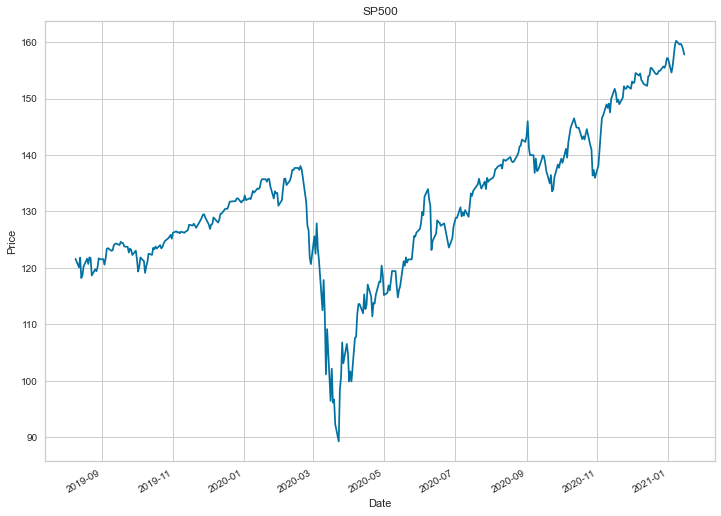

In [36]:
fig, ax = plt.subplots(figsize=(12, 9))
sp500_performance['price'].mean().plot()
ax.set_title("SP500")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

In [37]:
fig.tight_layout()
fig.savefig('./img/sp500')

## Other

### Quantities

In [38]:
num_symbols = df_performance['sym'].nunique()
print("There are", num_symbols, "symbols in our dataset")

There are 2024 symbols in our dataset


#### Checking how many of the SP500 symbols we have in our data

In [39]:
sp500_quantity = \
    df_performance.groupby('sym').sum()['SP500_1'] \
        .map(lambda x: False if x==0 else True).sum()
print(sp500_quantity, "of our stocks are in the S&P500")

386 of our stocks are in the S&P500


## Comparing our data to data from Yahoo Finance

<AxesSubplot:>

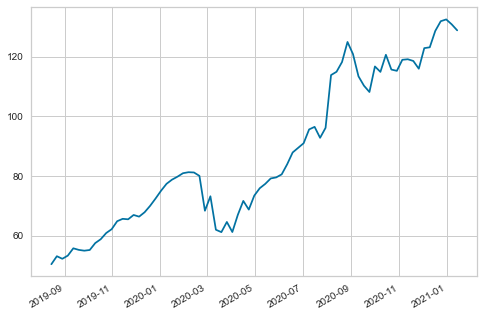

In [40]:
aapl_weekly_data = get_symbol_frequency(old_df_performance, 'AAPL', 'W-THU')
aapl_weekly_data['price'].plot()

![yahoo](./img/yahoo.jpg)

## AAPL differences to price

In [41]:
aapl_daily_data = get_symbol_frequency(df_performance, 'AAPL', 'D')

In [42]:
aapl_numerical = aapl_daily_data.select_dtypes('number')

In [43]:
y = aapl_numerical['price']
X = aapl_numerical.drop('price', axis=1)

In [44]:
X_val = X.values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_val)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = min_max_scaler.fit_transform(y.values.reshape(-1, 1))

In [45]:
y_scaled_df = pd.DataFrame(y_scaled, columns=['price'])
y_scaled_df.index = y.index
y_scaled_df.head()

price
2019-08-09  0.001
2019-08-12  0.000
2019-08-13  0.025
2019-08-14  0.007
2019-08-15  0.004

In [46]:
X_scaled_df_diff = X_scaled_df.diff()
X_scaled_df_diff.index = y.index
X_scaled_df_diff.head()

index  RevenueTTM  TotalCash  ExDividendDate  Dividend  \
2019-08-09    nan         nan        nan             nan       nan   
2019-08-12  0.003       0.000      0.000          -0.976     0.000   
2019-08-13  0.003       0.000      0.000           0.000     0.000   
2019-08-14  0.003       0.000      0.000           0.000     0.000   
2019-08-15  0.003       0.000      0.000           0.000     0.000   

            DividendYield  PriceToBook  PriceToSales  EnterpriseValue  \
2019-08-09            nan          nan           nan              nan   
2019-08-12          0.020       -0.004        -0.007           -0.006   
2019-08-13          0.004       -0.001        -0.001           -0.001   
2019-08-14         -0.067        0.014         0.023            0.022   
2019-08-15          0.048       -0.010        -0.017           -0.016   

            PriceToCashFlow  ...  industry_Transportation Infrastructure  \
2019-08-09              nan  ...                                     nan   
2019-08-12           -0.006  ...                                   0.000   
2019-08-13           -0.001  ...                                   0.000   
2019-08-14            0.022  ...                                   0.000   
2019-08-15           -0.016  ...                                   0.000   

            industry_Water Utilities  \
2019-08-09                       nan   
2019-08-12                     0.000   
2019-08-13                     0.000   
2019-08-14                     0.000   
2019-08-15                     0.000   

            industry_Wireless Telecommunication Services  Exchange_NASDAQ  \
2019-08-09                                           nan              nan   
2019-08-12                                         0.000            0.000   
2019-08-13                                         0.000            0.000   
2019-08-14                                         0.000            0.000   
2019-08-15                                         0.000            0.000   

            Exchange_NYSE  Exchange_OTC  Exchange_unknown  DJIA_1  \
2019-08-09            nan           nan               nan     nan   
2019-08-12          0.000         0.000             0.000   0.000   
2019-08-13          0.000         0.000             0.000   0.000   
2019-08-14          0.000         0.000             0.000   0.000   
2019-08-15          0.000         0.000             0.000   0.000   

            NASDAQ100_1  SP500_1  
2019-08-09          nan      nan  
2019-08-12        0.000    0.000  
2019-08-13        0.000    0.000  
2019-08-14        0.000    0.000  
2019-08-15        0.000    0.000  

[5 rows x 125 columns]

In [47]:
combined_df = pd.concat([y_scaled_df, X_scaled_df_diff], axis=1)
combined_df = combined_df.dropna()
combined_df.head()

price  index  RevenueTTM  TotalCash  ExDividendDate  Dividend  \
2019-08-12  0.000  0.003       0.000      0.000          -0.976     0.000   
2019-08-13  0.025  0.003       0.000      0.000           0.000     0.000   
2019-08-14  0.007  0.003       0.000      0.000           0.000     0.000   
2019-08-15  0.004  0.003       0.000      0.000           0.000     0.000   
2019-08-16  0.017  0.003       0.000      0.000           0.000     0.000   

            DividendYield  PriceToBook  PriceToSales  EnterpriseValue  ...  \
2019-08-12          0.020       -0.004        -0.007           -0.006  ...   
2019-08-13          0.004       -0.001        -0.001           -0.001  ...   
2019-08-14         -0.067        0.014         0.023            0.022  ...   
2019-08-15          0.048       -0.010        -0.017           -0.016  ...   
2019-08-16          0.008       -0.002        -0.003           -0.003  ...   

            industry_Transportation Infrastructure  industry_Water Utilities  \
2019-08-12                                   0.000                     0.000   
2019-08-13                                   0.000                     0.000   
2019-08-14                                   0.000                     0.000   
2019-08-15                                   0.000                     0.000   
2019-08-16                                   0.000                     0.000   

            industry_Wireless Telecommunication Services  Exchange_NASDAQ  \
2019-08-12                                         0.000            0.000   
2019-08-13                                         0.000            0.000   
2019-08-14                                         0.000            0.000   
2019-08-15                                         0.000            0.000   
2019-08-16                                         0.000            0.000   

            Exchange_NYSE  Exchange_OTC  Exchange_unknown  DJIA_1  \
2019-08-12          0.000         0.000             0.000   0.000   
2019-08-13          0.000         0.000             0.000   0.000   
2019-08-14          0.000         0.000             0.000   0.000   
2019-08-15          0.000         0.000             0.000   0.000   
2019-08-16          0.000         0.000             0.000   0.000   

            NASDAQ100_1  SP500_1  
2019-08-12        0.000    0.000  
2019-08-13        0.000    0.000  
2019-08-14        0.000    0.000  
2019-08-15        0.000    0.000  
2019-08-16        0.000    0.000  

[5 rows x 126 columns]

### AAPL plot against all column, differences

In [48]:
len(combined_df.columns)

126

In [49]:
cols = ['price',
 'RevenueTTM',
 'TotalCash',
 'Dividend',
 'DividendYield',
 'PriceToBook',
 'PriceToSales',
 'EnterpriseValue',
 'PriceToCashFlow',
 'PE',
 'ReturnonEquity',
 'FreeCashFlow',
 'TotalDebtToEquity',
 'PricePerformance52Weeks',
 'PricePerformanceYTD',
 'TotalReturn1Yr',
 'TotalReturn3Yr',
 'VolumeAvg90Day']

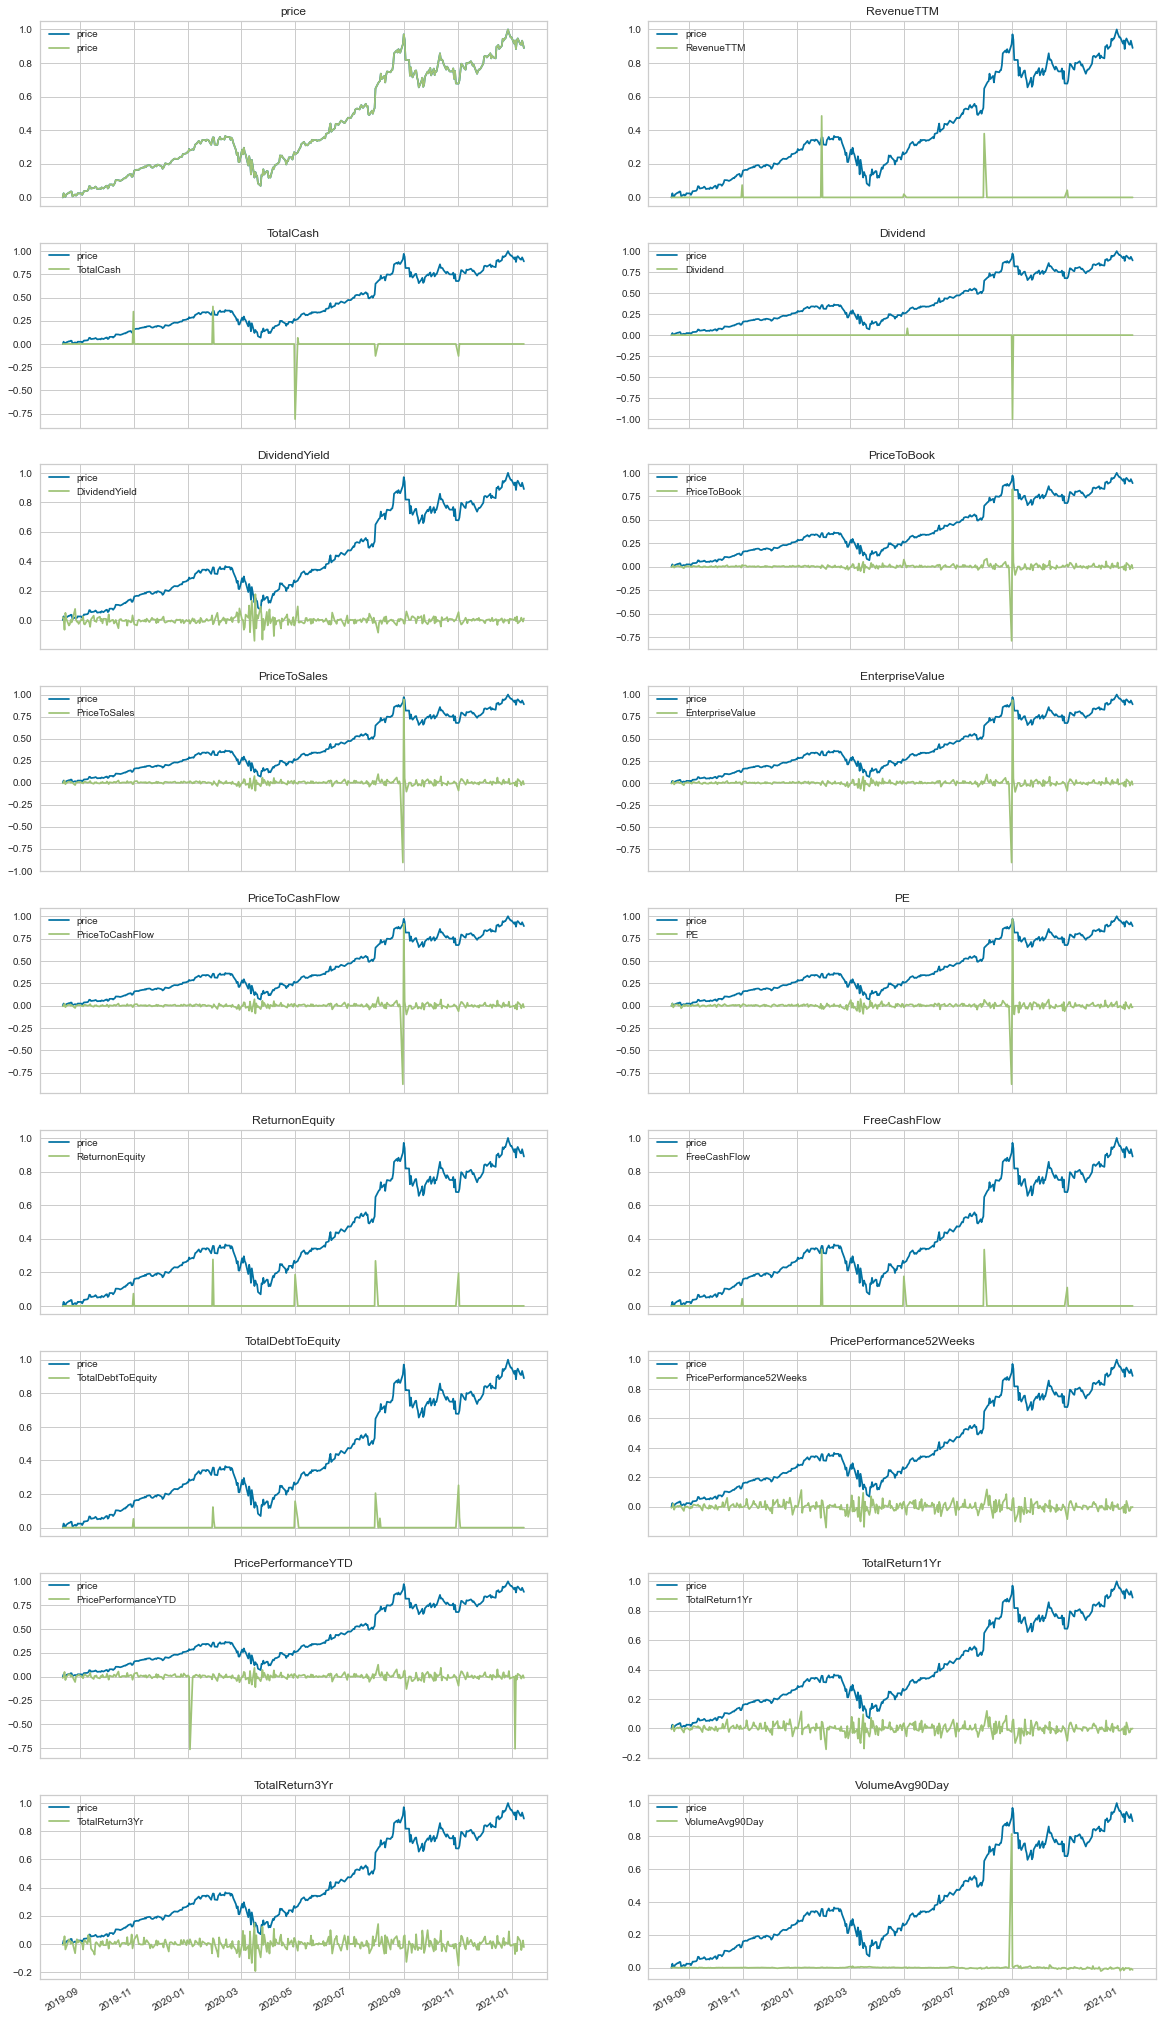

In [50]:
fig, axes = plt.subplots(figsize=(20, 40), nrows=9, ncols=2, sharex=True)
axes = axes.flatten()
for n, col in enumerate(cols):
    ax = axes[n]
    combined_df[['price', col]].plot(ax=ax)
    ax.set_title(col)

<div class="alert alert-warning shadow">
  <strong>About the plot:</strong>
    <ul>
        <li>You can see when appl price split in `VolumeAvg90Day` peaked.
        </li>
        <li>Features such as `ReturnonEquity` are quarterly reports, thus they are showing differencing on the quarters.</li>
    </ul>
</div>

In [51]:
fig.tight_layout()
fig.savefig('./img/aapl_differ.jpg')

# EDA -> Correlation
> During some Time Series modeling performance had almost infinite loss when trying to predict tomorrow.  We will have to devise a way to find the best overall columns for predictions, and use those to try and model the data.

> The steps we will take to do this are as follows:
> * ~~Scale all of the data between the min and max of the whole dataset so that floats are accounted for for every data point~~
> * We don't have to worry about scaling because pandas correlation takes care of it
> * Difference the data so that it is showing how much a feature went up or down rather than the feature itself
> * for each column shift it backwards by one so the correlation to other columns going up or down would show through

### Functions and Checkpoint

In [52]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model_df = pd.read_pickle("./data/modeling/model_df.pkl")
model_df.head()

A_RevenueTTM  A_TotalCash  A_ExDividendDate  A_Dividend  \
date                                                                  
2019-08-09      5019.000     2155.000                 0       0.164   
2019-08-12      5019.000     2155.000                 0       0.164   
2019-08-13      5019.000     2155.000                 0       0.164   
2019-08-14      5019.000     2155.000                 0       0.164   
2019-08-15      5090.000     1765.000                 0       0.164   

            A_DividendYield  A_PriceToBook  A_PriceToSales  A_EnterpriseValue  \
date                                                                            
2019-08-09            0.944          4.298           4.402    21670704590.000   
2019-08-12            0.956          4.246           4.348    21401262240.000   
2019-08-13            0.985          4.121           4.221    20764110330.000   
2019-08-14            0.970          4.184           4.285    21084271240.000   
2019-08-15            1.000          4.283           4.068    20365900000.000   

            A_PriceToCashFlow   A_PE  ...  ZTS_McLeanCapital  ZTS_NedDavis  \
date                                  ...                                    
2019-08-09             16.574 19.800  ...              3.000         3.000   
2019-08-12             16.371 19.200  ...              3.000         3.000   
2019-08-13             15.892 19.500  ...              3.000         3.000   
2019-08-14             16.132 18.900  ...              3.000         3.000   
2019-08-15             16.051 20.800  ...              3.000         3.000   

            ZTS_TradingCentral  ZTS_Zacks  ZTS_SPValuation  ZTS_SPQuality  \
date                                                                        
2019-08-09                   1          3           88.000         87.000   
2019-08-12                   1          3           88.000         87.000   
2019-08-13                   1          5           88.000         87.000   
2019-08-14                   1          5           88.000         87.000   
2019-08-15                   1          5           88.000         87.000   

            ZTS_SPGrowthStability  ZTS_SPFinancialHealth  \
date                                                       
2019-08-09                 30.000                 58.000   
2019-08-12                 30.000                 58.000   
2019-08-13                 28.000                 56.000   
2019-08-14                 28.000                 56.000   
2019-08-15                 30.000                 57.000   

            ZTS_ThomsonReutersVerus  ZTS_ThomsonReutersIBES  
date                                                         
2019-08-09                    3.000                   1.941  
2019-08-12                    3.000                   1.941  
2019-08-13                    3.000                   1.941  
2019-08-14                    3.000                   1.941  
2019-08-15                    3.000                   1.941  

[5 rows x 13510 columns]

In [53]:
def split_df_sym_col(df, sym=False, col=False):
    """returns a data frame where sym and col match"""
    _col = col
    if sym:
        if isinstance(sym, str):
            sym = [sym]
        df = df[[col for col in df.columns if col.split('_')[0] in sym]]
    if _col:
        if isinstance(_col, str):
            _col = [_col]
        df = df[[col for col in df.columns if col.split('_')[1] in _col]]
    return df.copy()


def get_correlation(df, sym):
    """Returns the correlation totals the columns of a symbol"""
    df = split_df_sym_col(df, sym).diff().copy()
    correlation_totals = {}
    for col in df.columns:
        _df = df.copy()
        _df[col] = _df[col].shift(1)
        correlation_totals[col.split('_')[1]] = _df.corr()[col].drop(col).sum()
    return correlation_totals.copy()


def get_correlation_price_shift(df, sym, price_shift=-1):
    """Returns the correlation of change of each feature to changes in
       price n days ahead"""
    df = split_df_sym_col(df, sym).diff().copy()
    correlation_totals = {}
    for col in df.columns:
        _df = df.copy()
        if col == f'{sym}_price':  # for correlation of price tomorrow with itself today
            _df = split_df_sym_col(df, sym, ['price']).copy()
            _df2 = _df.copy().rename({col: 'price_diff_before'}, axis=1)
            _df = pd.concat([_df, _df2.shift(price_shift)], axis=1)
            correlation_totals[col.split('_')[1]] = _df.corr()['price_diff_before'].drop('price_diff_before').sum()
        else:
            _df = split_df_sym_col(df, sym, [col.split('_')[1], 'price']).copy()
            _df[f'{sym}_price'] = _df[f'{sym}_price'].shift(price_shift)
            correlation_totals[col.split('_')[1]] = _df.corr()[col].drop(col).sum()
    return correlation_totals.copy()


def get_num_correlations_sym(sym, num):
    """Uses the above price correlation function and gets the data for num 
       days in advance"""
    correlations = {}
    for i in range(num+1):
        correlation = get_correlation_price_shift(model_df, "VLO", -i)
        correlations[f"{i}_day"] = pd.Series(correlation)
    caption = f"( {sym} ) {df_company.loc[sym]['company']} seven day price correlations"
    seven_day_corr = pd.DataFrame(correlations)

    return seven_day_corr.sort_values(by=list(seven_day_corr.columns[1:]),
                                      ascending=False) \
        .style.background_gradient(cmap='PRGn_r').set_caption(caption)

## Function tests

### split_df_sym_col

In [54]:
split_df_sym_col(model_df, ['AAPL', 'VLO'], 'price')

AAPL_price  VLO_price
date                             
2019-08-09      50.235     78.850
2019-08-12      50.120     77.150
2019-08-13      52.242     78.740
2019-08-14      50.688     76.000
2019-08-15      50.435     76.720
...                ...        ...
2021-01-11     128.980     58.640
2021-01-12     128.800     59.510
2021-01-13     130.890     57.700
2021-01-14     128.910     60.270
2021-01-15     127.140     58.300

[372 rows x 2 columns]

In [55]:
split_df_sym_col(model_df, ['AAPL'], ['price', 'TotalCash'])

AAPL_TotalCash  AAPL_price
date                                  
2019-08-09       94880.000      50.235
2019-08-12       94880.000      50.120
2019-08-13       94880.000      52.242
2019-08-14       94880.000      50.688
2019-08-15       94880.000      50.435
...                    ...         ...
2021-01-11       90979.000     128.980
2021-01-12       90979.000     128.800
2021-01-13       90979.000     130.890
2021-01-14       90979.000     128.910
2021-01-15       90979.000     127.140

[372 rows x 2 columns]

### get_correlation

In [56]:
print("Correlation sum between columns for VLO")
correlation = get_correlation(model_df, "VLO")
pd.Series(correlation).sort_values(ascending=False)

Correlation sum between columns for VLO


price                      5.562
DividendYield              0.856
FreeCashFlow               0.804
ReturnonEquity             0.719
Zacks                      0.698
PE                         0.561
Jefferson                  0.511
SPFinancialHealth          0.465
ISSEVA                     0.419
McLeanCapital              0.375
SPQuality                  0.302
StarMine                   0.300
ExDividendDate             0.286
SPGrowthStability          0.262
ThomsonReutersVerus        0.105
TotalReturn1Yr             0.097
PricePerformance52Weeks    0.095
Dividend                   0.078
SPValuation                0.001
ColumbineCapital           0.000
Argus                      0.000
NedDavis                   0.000
PricePerformanceYTD       -0.091
RevenueTTM                -0.106
TotalDebtToEquity         -0.197
FordEquityResearch        -0.249
TotalCash                 -0.288
ThomsonReutersIBES        -0.370
EnterpriseValue           -0.513
PriceToSales              -0.550
TradingCen

### get_correlation_price_shift

In [57]:
# Quick test from building the function

df = model_df.copy()
correlation_totals = {}
# for col in df.columns:
col = 'AAPL_Zacks'
sym = 'AAPL'
_df = split_df_sym_col(df, sym, [col.split('_')[1], 'price']).diff().copy()
_df[col] = _df[col].shift(1)
correlation_totals[col.split('_')[1]] = _df.corr()[col].drop(col).sum()
correlation_totals.copy()

{'Zacks': 0.00769449425101219}

In [58]:
correlation = get_correlation_price_shift(model_df, "VLO")
one_day_correlation = pd.Series(correlation).sort_values(ascending=False)
one_day_correlation

ThomsonReutersIBES         0.111
ReturnonEquity             0.096
RevenueTTM                 0.076
ExDividendDate             0.073
PriceToBook                0.056
Zacks                      0.049
TotalReturn3Yr             0.047
PricePerformanceYTD        0.043
PricePerformance52Weeks    0.037
FreeCashFlow               0.037
TotalReturn1Yr             0.034
ISSEVA                     0.033
EnterpriseValue            0.028
ThomsonReutersVerus        0.024
SPGrowthStability          0.023
Dividend                   0.013
StarMine                   0.009
PriceToSales               0.002
Argus                      0.000
NedDavis                   0.000
ColumbineCapital           0.000
SPFinancialHealth         -0.010
DividendYield             -0.012
Jefferson                 -0.014
FordEquityResearch        -0.019
SPValuation               -0.034
price                     -0.035
SPQuality                 -0.039
TotalCash                 -0.044
PriceToCashFlow           -0.046
TradingCen

> Thus if ThomsonReuters goes up for VLO it is likely that price will go up.  Let's plot it and see

Text(0.5, 1.0, 'VLO correlation to ThomsonReutersIBES')

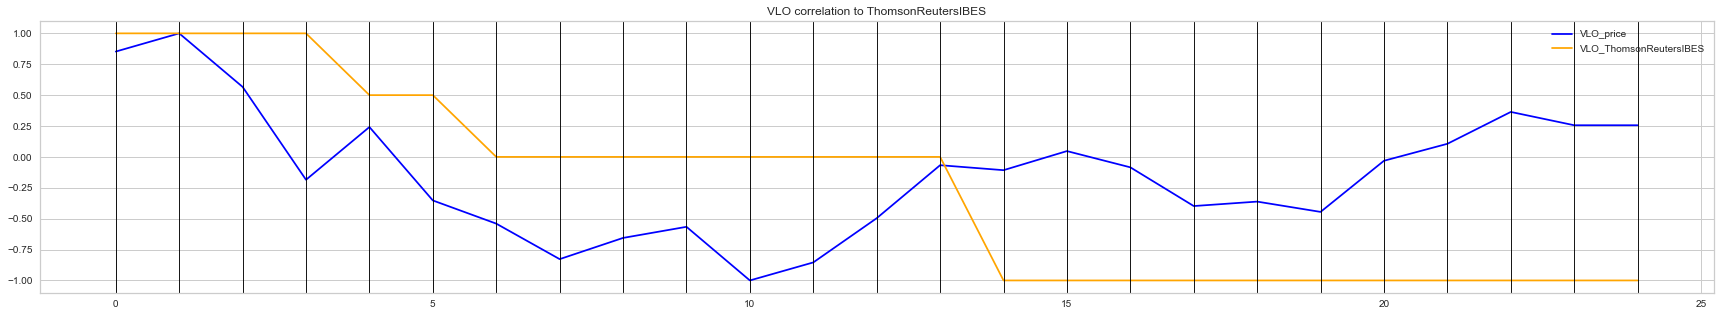

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
temp_df = split_df_sym_col(model_df, 'VLO', ['ThomsonReutersIBES', 'price'])[150:175]
fig, ax = plt.subplots(figsize=(30, 5))
pd.DataFrame(scaler.fit_transform(temp_df), columns=temp_df.columns).plot(ax=ax, color=['blue', 'orange'])
for i in range(len(temp_df)):
    ax.axvline(i, linewidth=.9, c='black')
ax.set_title("VLO correlation to ThomsonReutersIBES")

> You can see above that most of the time when ThomsonReutersIBES goes one direction, price goes the same direction the following day,  this is a small window of the whole at day 150 -> day 175

> It seems PE has a strong negative correlation to price for VLO, we'll plot that as well

Text(0.5, 1.0, 'VLO correlation to PE')

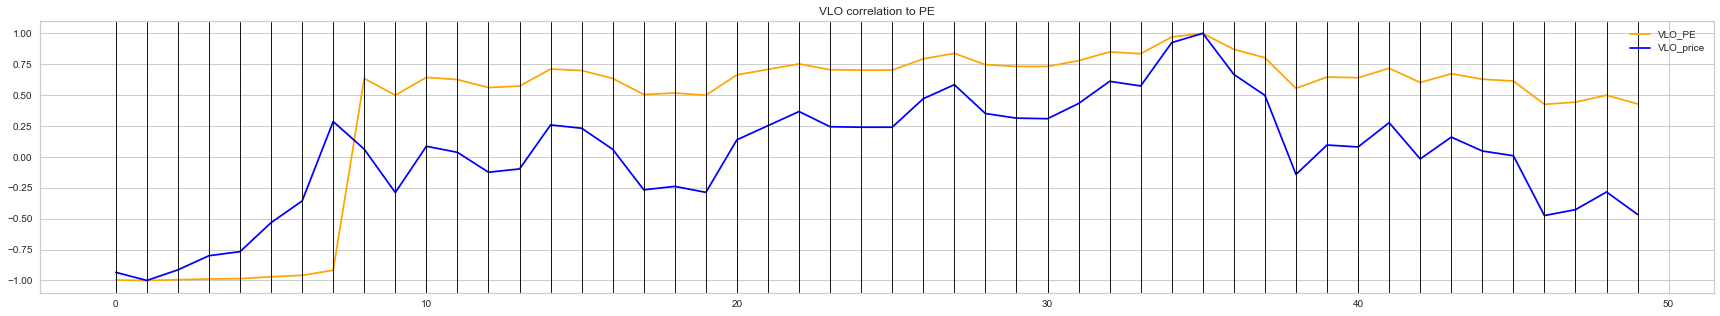

In [60]:
scaler = MinMaxScaler((-1, 1))
temp_df = split_df_sym_col(model_df, 'VLO', ['PE', 'price'])[180:230]
fig, ax = plt.subplots(figsize=(30, 5))
pd.DataFrame(scaler.fit_transform(temp_df), columns=temp_df.columns).plot(ax=ax, color=['orange', 'blue'])
for i in range(len(temp_df)):
    ax.axvline(i, linewidth=.9, c='black')
ax.set_title("VLO correlation to PE")

> Again this is a small window but you can see price going down the next day after PE goes up

#### two day shift test

In [61]:
correlation = get_correlation_price_shift(model_df, "VLO", -2)
two_day_correlation = pd.Series(correlation).sort_values(ascending=False)
two_day_correlation

SPFinancialHealth          0.142
PE                         0.108
SPValuation                0.104
DividendYield              0.061
SPQuality                  0.041
Dividend                   0.041
RevenueTTM                 0.040
Jefferson                  0.038
ThomsonReutersVerus        0.024
McLeanCapital              0.018
price                      0.012
ThomsonReutersIBES         0.007
FordEquityResearch         0.002
NedDavis                   0.000
ColumbineCapital           0.000
Argus                      0.000
FreeCashFlow              -0.009
SPGrowthStability         -0.010
PriceToCashFlow           -0.011
ISSEVA                    -0.013
Zacks                     -0.013
PricePerformanceYTD       -0.028
TradingCentral            -0.032
TotalDebtToEquity         -0.034
TotalReturn1Yr            -0.035
PricePerformance52Weeks   -0.035
ExDividendDate            -0.036
VolumeAvg90Day            -0.039
TotalCash                 -0.042
TotalReturn3Yr            -0.042
Enterprise

#### Combined

In [62]:
combined_correlation = pd.concat([one_day_correlation, two_day_correlation],
                                 axis=1)
combined_correlation.columns = ['one_day', 'two_day']
caption = "( VLO ) Valero one and two day price correlations"
combined_correlation.sort_values(by=['one_day', 'two_day'], ascending=False) \
    .style.background_gradient(cmap='PRGn_r').set_caption(caption)

### get_num_correlations_sym

In [63]:
get_num_correlations_sym('AAPL', 7)

## Make a dataframe with the correlations
> Here we will make a data frame of all the column correlations of all the symbols, and look at the totals of that for each column.  From that we can decide what columns to keep, and which to drop

In [64]:
all_symbols = [col.split('_')[0] for col in model_df.columns if 'price' in col]
len(all_symbols)

386

In [65]:
start_time = time.time()

correlation_all = {}
for sym in all_symbols:
    correlation_all[sym] = get_correlation(model_df, sym)

print("time taken:", round((time.time() - start_time), 2), 'seconds')

time taken: 21.92 seconds


In [66]:
corr_df = pd.DataFrame(correlation_all)

# Saving our correlation dataset
corr_df.to_csv("./bin/all_column_correlation_each_other.csv")

corr_df.head()

A    AAL    AAP  AAPL  ABBV   ABC   ABMD    ABT    ACN  \
RevenueTTM      0.424  0.818  1.318 0.976 1.018 1.516  1.150 -0.303 -0.289   
TotalCash      -0.596  0.176 -1.654 0.415 0.419 0.972 -0.256 -0.360  0.272   
ExDividendDate  0.105 -0.184  0.339 0.444 0.725 0.831  0.000 -0.238  0.369   
Dividend        0.202  0.000  0.241 0.143 0.930 0.539  0.000  0.885  0.277   
DividendYield   1.687 -0.917  0.998 0.928 1.108 1.636  0.000  1.608  1.582   

                 ADBE  ...    XEL   XLNX   XRAY    XRX   XYL    YUM   ZBH  \
RevenueTTM     -0.275  ...  0.377  0.133 -0.039 -0.367 0.281  0.618 0.344   
TotalCash      -0.045  ...  0.238  0.320 -0.116 -0.401 0.229 -0.797 0.258   
ExDividendDate  0.000  ...  0.013 -0.015 -0.289  0.723 0.370  0.240 0.208   
Dividend        0.000  ... -0.014  0.108  0.000  0.000 0.460  0.058 0.000   
DividendYield   0.000  ...  0.635  1.028 -0.408  0.627 1.181  0.260 0.136   

                 ZBRA   ZION    ZTS  
RevenueTTM      0.354 -0.051 -1.201  
TotalCash      -0.029  0.233 -0.716  
ExDividendDate  0.000  0.259 -0.613  
Dividend        0.000  0.000 -0.120  
DividendYield   0.000  0.308  1.534  

[5 rows x 386 columns]

### Viewing the totals of the correlation dataframe

In [67]:
# Getting the total's min, max, mean, and sum then combining
totals_df = corr_df.transpose().describe().loc[['min', 'max', 'mean']].transpose()
sum_df = pd.DataFrame(corr_df.transpose().sum().sort_values(ascending=False))
totals_df['sum'] = sum_df

# Sorting by sum then max, and saving to csv
totals_sorted = totals_df.sort_values(by=['sum', 'max'], ascending=False).astype('float32')
totals_sorted = totals_sorted.round(1)

# Saving it
totals_sorted.to_csv("./bin/all_column_correlation_display.csv")

In [68]:
# Reloading it
# Simply change RELOAD to True to reload the given table
RELOAD = False
if RELOAD:
    totals_sorted = pd.read_csv('./bin/all_column_correlation_display.csv') \
        .rename({"Unnamed: 0": "column"}, axis=1).set_index('column', drop=True)

# Displaying it
totals_sorted.style.background_gradient(cmap='PRGn_r')

<div class="alert alert-warning shadow">
  <strong>After checking the above we will be dropping the following columns because they have the lowest total correlation (positive or negative) to the rest of the columns.  This will make the neural network more accurate</strong>
    <ul>
<li>ReturnonEquity</li>
<li>ThomsonReutersVerus</li>
<li>TotalCash</li>
<li>SPFinancialHealth</li>
<li>ISSEVA</li>
<li>SPValuation</li>
<li>SPGrowthStability</li>
<li>SPQuality</li>
<li>ExDividendDate</li>
<li>Zacks</li>
<li>NedDavis</li>
<li>Dividend</li>
<li>Argus</li>
<li>Jefferson</li>
<li>McLeanCapital</li>
<li>StarMine</li>
<li>TradingCentral</li>
<li>TotalDebtToEquity</li>
<li>ColumbineCapital</li>
<li>ThomsonReutersIBES</li>
</ul>
</div>

In [69]:
drop_cols = [
    "ReturnonEquity", "ThomsonReutersVerus", "TotalCash", "SPFinancialHealth",
    "ISSEVA", "SPValuation", "SPGrowthStability", "SPQuality", "ExDividendDate",
    "Zacks", "NedDavis", "Dividend", "Argus", "Jefferson", "McLeanCapital",
    "StarMine", "TradingCentral", "TotalDebtToEquity", "ColumbineCapital",
    "ThomsonReutersIBES"]

## Finding Price Correlations One Day Shift
> From the above I devised I could find what most correlates positively or negatively specifically to price.  We will do that before attempting to model with the columns dropped out of the dataset.
> * Difference all of the data
> * Shift price back by one
> * Get correlation of each column to price
> * Plot totals

In [70]:
start_time = time.time()

correlation_all = {}
for sym in all_symbols:
    correlation_all[sym] = get_correlation_price_shift(model_df, sym)

print("time taken:", round((time.time() - start_time), 2), 'seconds')

time taken: 21.04 seconds


In [71]:
corr_df = pd.DataFrame(correlation_all)

# Saving data
corr_df.to_csv("./bin/correlation_by_symbol_col_to_price_one_day.csv")

corr_df.head()

A   AAL    AAP   AAPL   ABBV    ABC  ABMD    ABT    ACN  \
RevenueTTM     -0.003 0.034 -0.049  0.037 -0.018  0.075 0.096 -0.021 -0.087   
TotalCash      -0.017 0.034  0.001 -0.016  0.021  0.047 0.040  0.012  0.091   
ExDividendDate  0.048 0.039 -0.052  0.058 -0.053  0.109 0.000 -0.079 -0.049   
Dividend        0.062 0.000 -0.031  0.071 -0.007  0.125 0.000  0.013  0.038   
DividendYield  -0.123 0.055 -0.093 -0.013 -0.150 -0.130 0.000 -0.073 -0.128   

                ADBE  ...    XEL   XLNX   XRAY    XRX    XYL    YUM    ZBH  \
RevenueTTM     0.081  ...  0.028 -0.024 -0.016 -0.022 -0.049  0.056  0.020   
TotalCash      0.029  ... -0.007 -0.014  0.083  0.025  0.029 -0.131 -0.048   
ExDividendDate 0.000  ...  0.092 -0.006  0.055  0.014  0.045 -0.017 -0.007   
Dividend       0.000  ... -0.018 -0.058  0.000  0.000  0.051  0.052  0.000   
DividendYield  0.000  ... -0.114 -0.134 -0.032 -0.111 -0.150 -0.032 -0.032   

                 ZBRA   ZION    ZTS  
RevenueTTM     -0.003  0.031 -0.064  
TotalCash      -0.066 -0.009 -0.037  
ExDividendDate  0.000  0.009  0.003  
Dividend        0.000  0.000  0.043  
DividendYield   0.000 -0.030 -0.124  

[5 rows x 386 columns]

### Plotting

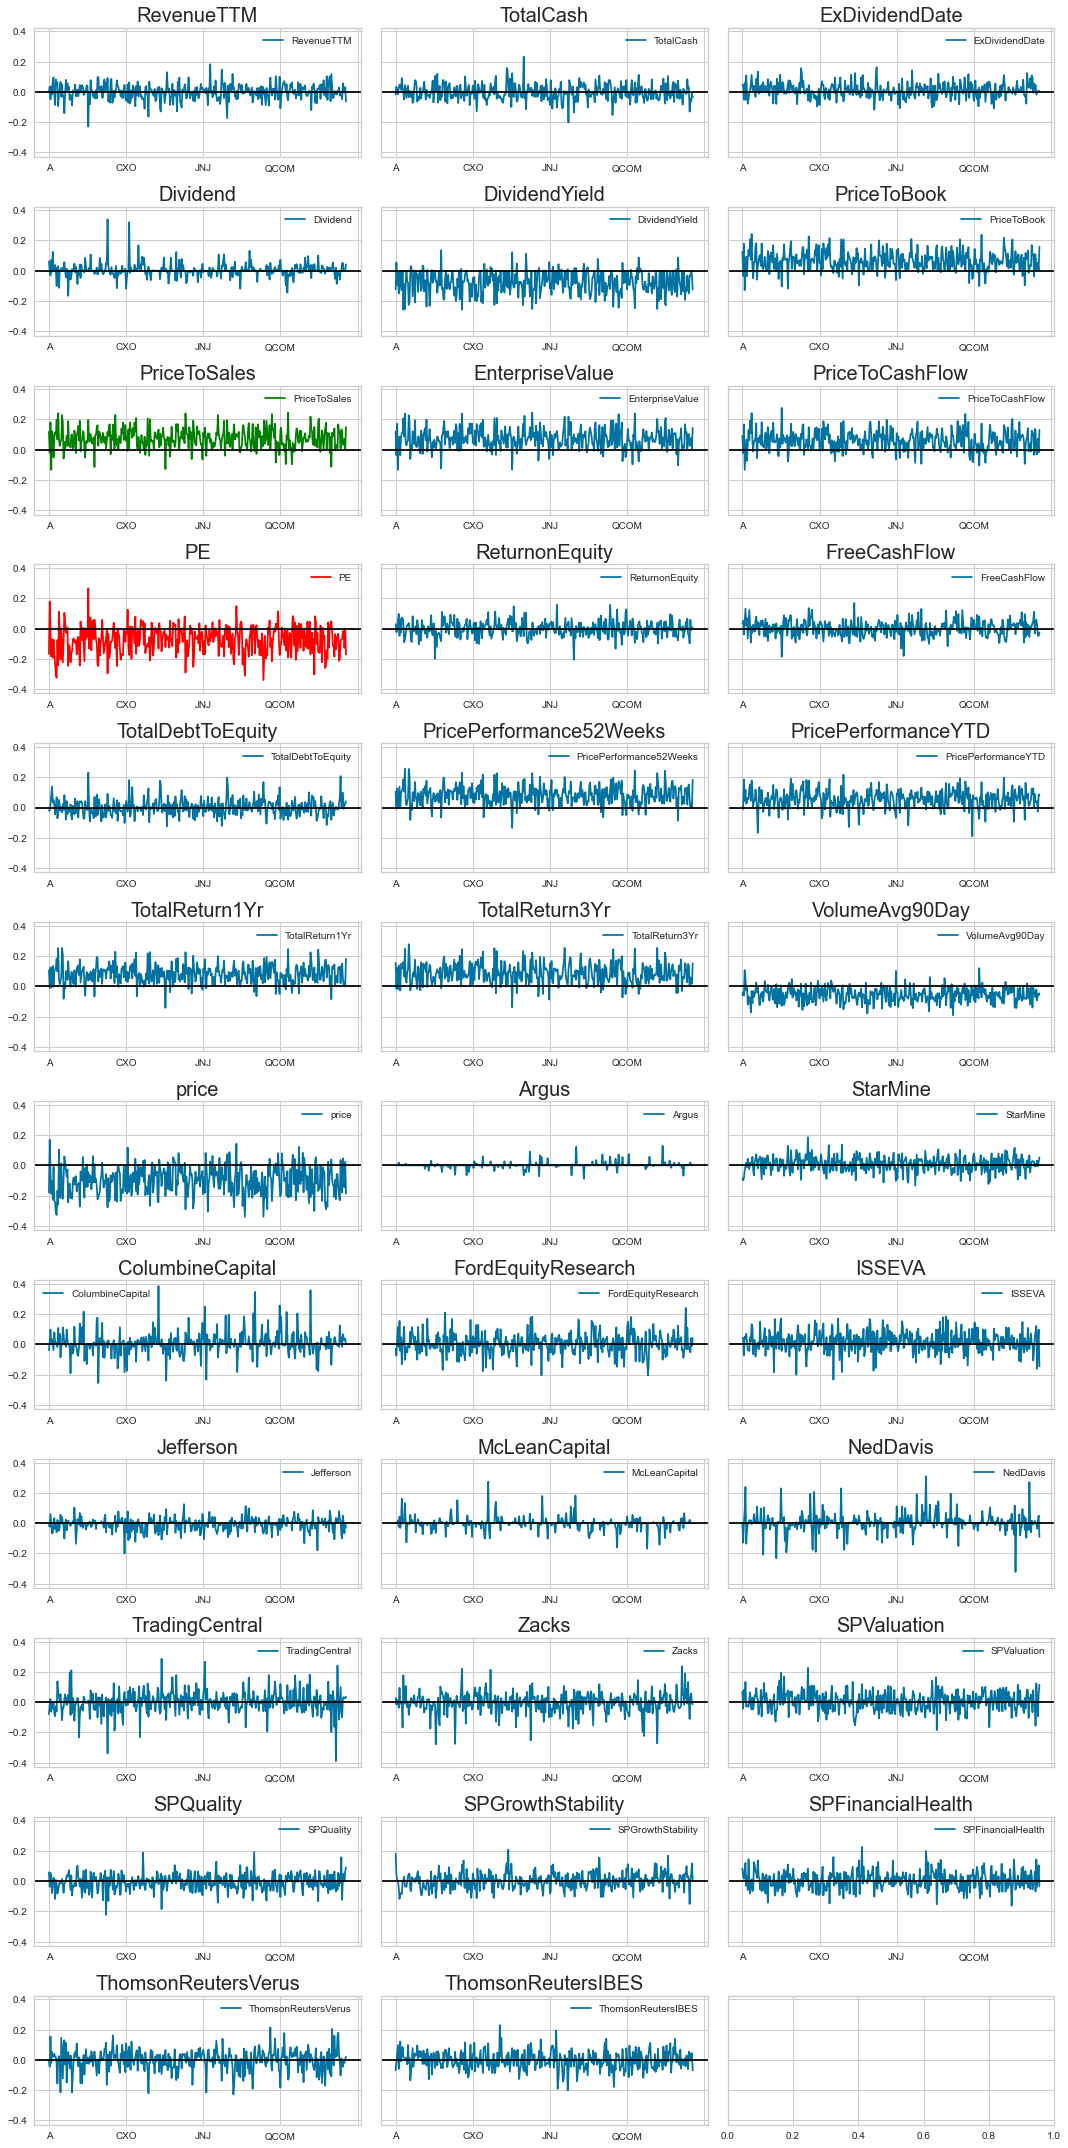

In [72]:
corr_df_transposed = corr_df.transpose()
# 35 columns
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 30), sharey=True)
axes = axes.flatten()
for num, col in enumerate(corr_df_transposed.columns):
    if col == 'PE':
        corr_df_transposed.reset_index().plot(
            'index', col, ax=axes[num], c='red')
    elif col == "PriceToSales":
        corr_df_transposed.reset_index().plot(
            'index', col, ax=axes[num], c='green')
    else:
        corr_df_transposed.reset_index().plot(
            'index', col, ax=axes[num])
    axes[num].axhline(0, c='black')
    axes[num].set_title(col, fontsize=20)
    axes[num].set_xlabel('')
fig.tight_layout()

<div class="alert alert-warning shadow">
  <strong>About the plot:</strong>
        You can see such as before in VLO( Valero ) <span style="color:red">`PE`, in red</span> has a negative correlation to price, and a new positive correlation to price <span style="color:green">in green , `PriceToSales`</span>.
</div>

In [73]:
# Saving the figure
fig.savefig('./bin/price_correlation_difference_one_day.png', transparent=True)

### Plotting with drop_cols as red

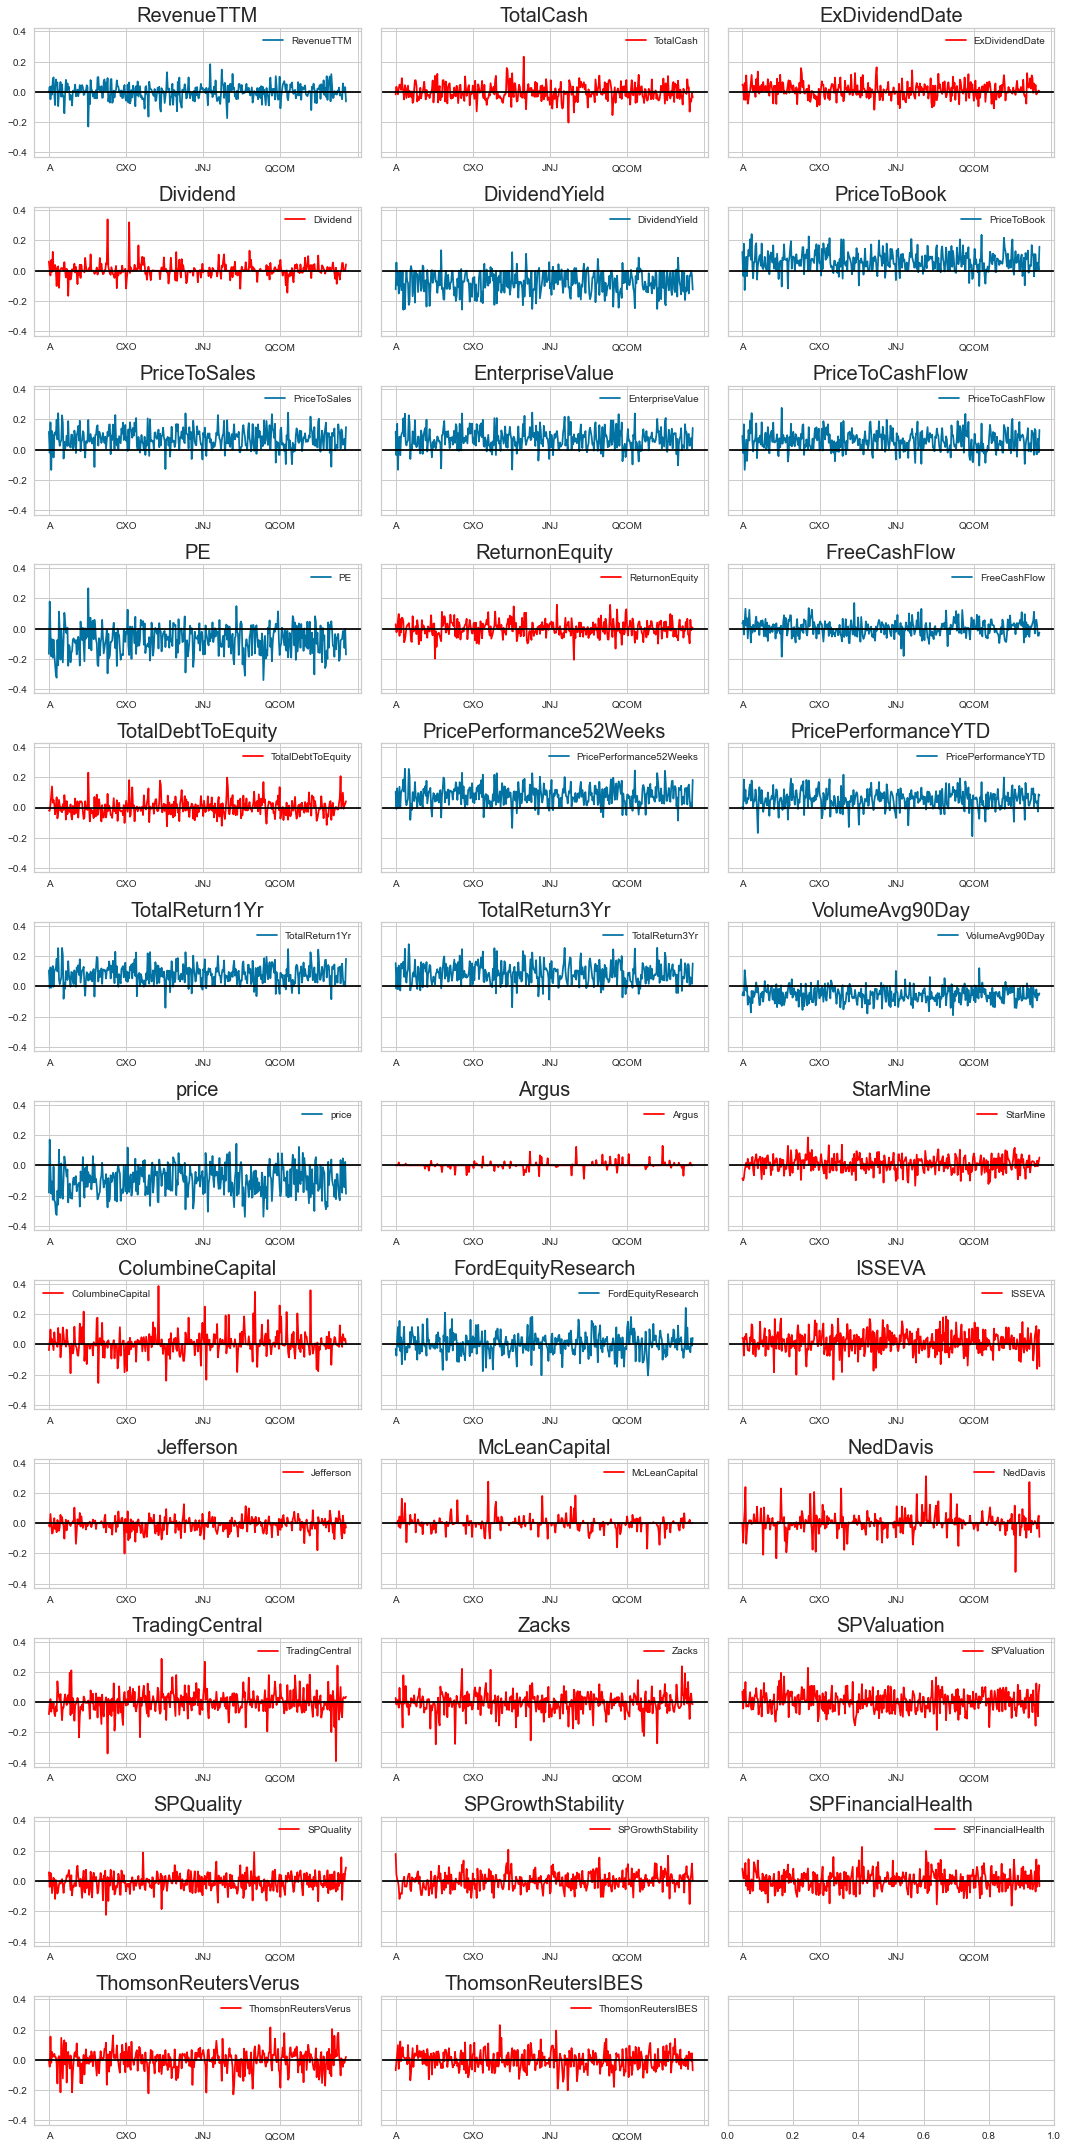

In [74]:
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 30), sharey=True)
axes = axes.flatten()

for num, col in enumerate(corr_df_transposed.columns):
    if col in drop_cols:
        corr_df_transposed.reset_index().plot(
            'index', col, ax=axes[num], c='red')
        axes[num].axhline(0, c='black')
    else:
        corr_df_transposed.reset_index().plot(
            'index', col, ax=axes[num])
        axes[num].axhline(0, c='black')
    axes[num].set_xlabel('')
    axes[num].set_title(col, fontsize=20)
fig.tight_layout()

<div class="alert alert-warning shadow">
  <strong>About the plot:</strong>
        In red you can see the columns that are going to be dropped.  They are overall more normally distributed, thus not useful in predicting what tomorrow's price is going to be
</div>

In [75]:
# Saving the figure
fig.savefig("./bin/highlight_bad_columns_one_day.jpg")

## Finding Price Correlation Two Day Shift
> Above we plotted the correlation difference of a symbol to one day ahead,  now we will shift price back two days rather than one and plot that map

In [76]:
start_time = time.time()

correlation_all_two = {}
for sym in all_symbols:
    correlation_all_two[sym] = get_correlation_price_shift(model_df, sym, -2)

print("time taken:", round((time.time() - start_time), 2), 'seconds')

time taken: 20.83 seconds


In [77]:
corr_df_two = pd.DataFrame(correlation_all_two)

# Saving data
corr_df_two.to_csv("./bin/correlation_by_symbol_col_to_price_two_day.csv")

corr_df_two_transposed = corr_df_two.transpose()

### Plotting

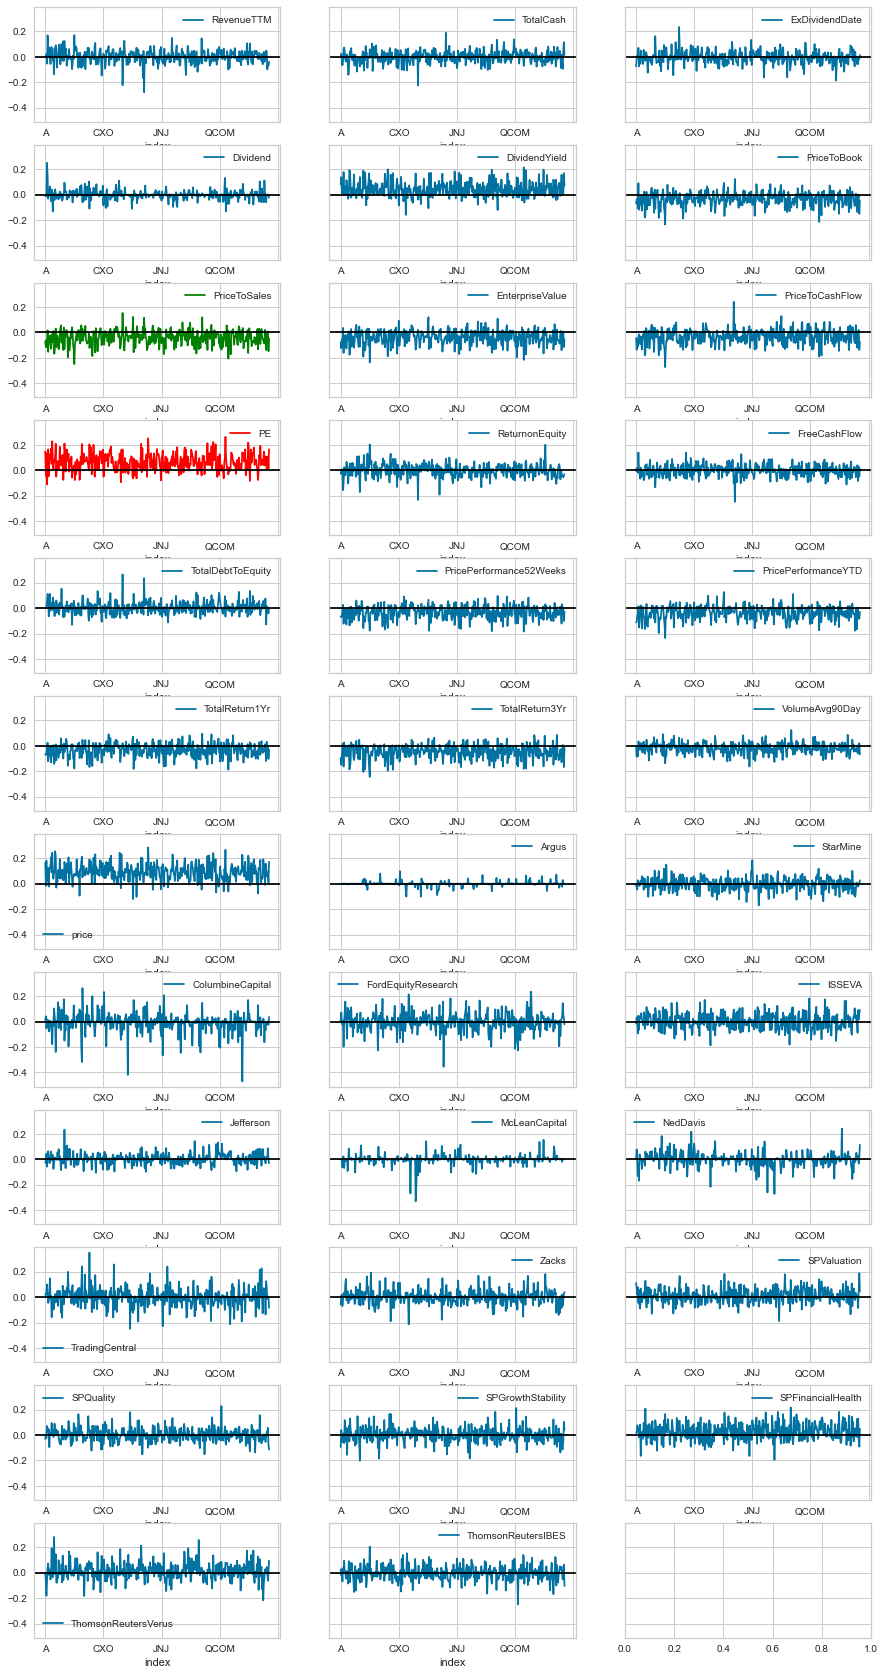

In [78]:
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 30), sharey=True)
axes = axes.flatten()

for num, col in enumerate(corr_df_two_transposed.columns):
    if col == 'PE':
        corr_df_two_transposed.reset_index().plot(
            'index', col, ax=axes[num], c='red')
    elif col == "PriceToSales":
        corr_df_two_transposed.reset_index().plot(
            'index', col, ax=axes[num], c='green')
    else:
        corr_df_two_transposed.reset_index().plot(
            'index', col, ax=axes[num])
    axes[num].axhline(0, c='black')

<div class="alert alert-warning shadow">
  <strong>About the plot:</strong>
        We kept the same red and green highlights before, and the correlations seem to have reversed on those.  If we want to know two days ahead we may want to train separate models for doing so.  One model for predicting tomorrow, and another for predicting day after tomorrow with the data generated from the first model.
</div>

In [79]:
# Saving figure
fig.savefig('./bin/price_correlation_difference_two_day.png')

### Plotting with drop_cols as red ( Two day shift)

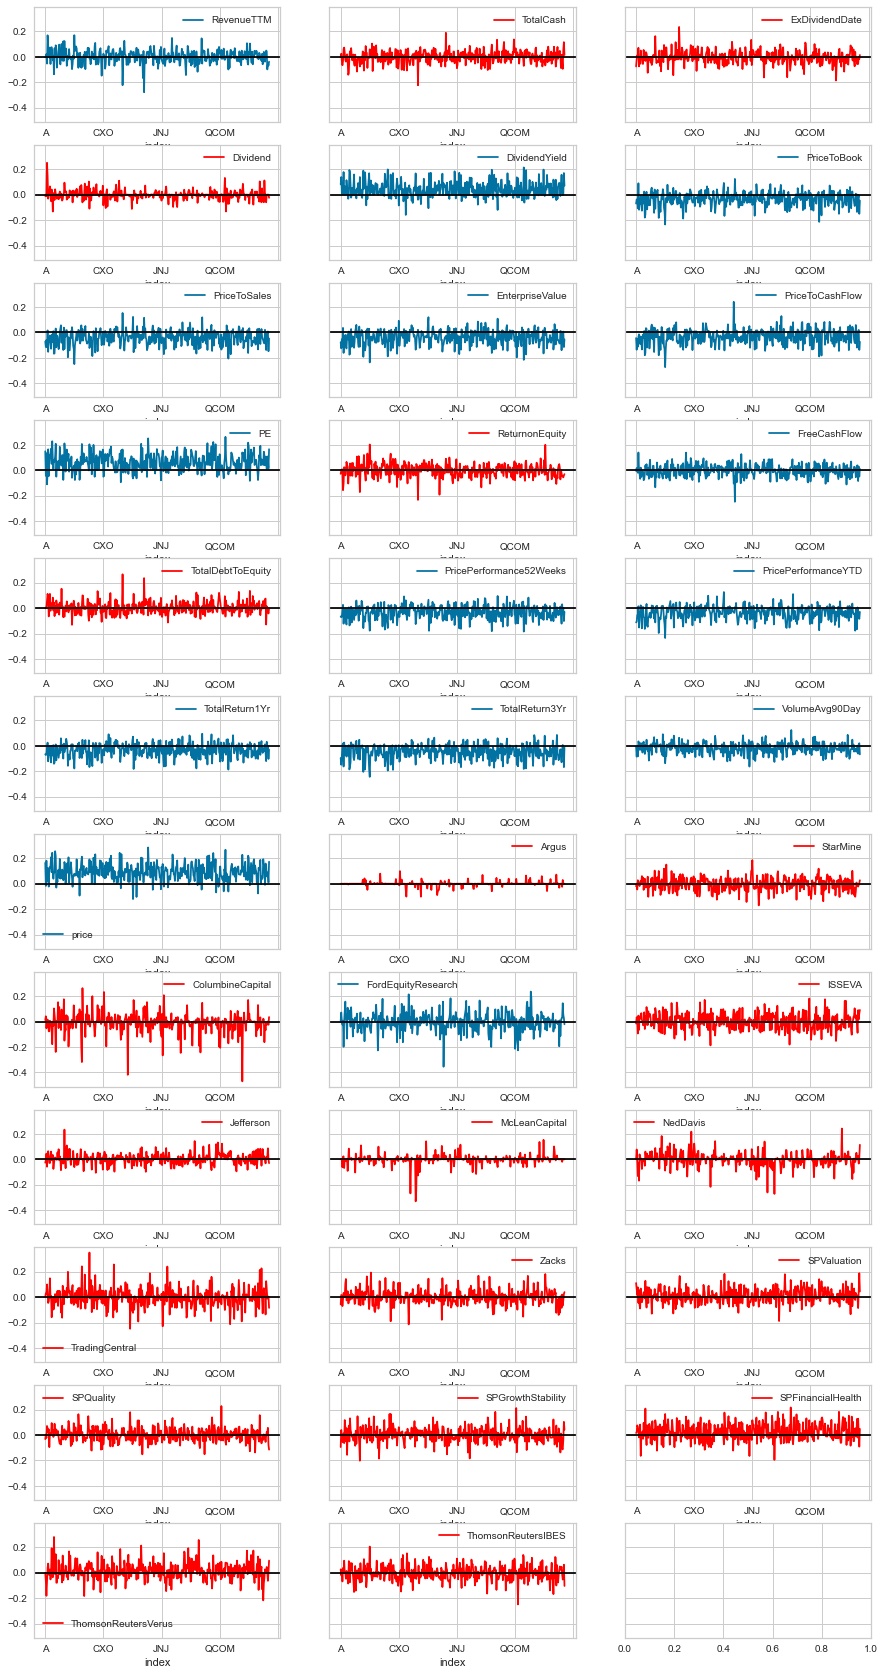

In [80]:
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 30), sharey=True)
axes = axes.flatten()

for num, col in enumerate(corr_df_two_transposed.columns):
    if col in drop_cols:
        corr_df_two_transposed.reset_index().plot(
            'index', col, ax=axes[num], c='red')
        axes[num].axhline(0, c='black')
    else:
        corr_df_two_transposed.reset_index().plot(
            'index', col, ax=axes[num])
        axes[num].axhline(0, c='black')

<div class="alert alert-warning shadow">
  <strong>About the plot:</strong>
        In red you can see the columns that are going to be dropped.  Like before they are overall more normally distributed, thus not useful in predicting what tomorrow's price is going to be.
</div>

In [81]:
# Saving figure
fig.savefig("./bin/highlight_bad_columns_two_day.png")

# Modeling

> * Predict one stock price with that stocks data
> * Predict one price with all other prices
> * Predict one price with from industry data

## Functions

In [82]:
def save_output(output, filepath):
    "Saves jupyter cell output to an openable report.html"
    plot_names = [
        "prediction_scoring",
        "classification_scoring",
        "summary_importances",
        "bar_importances"
    ]
    plot_names.reverse()
    with open (filepath + "/report.html", 'w') as f:
        for out in output.outputs:
            print(list(out.__dict__['data'].keys()))
            print(out.__dict__['data'])
            query = list(out.__dict__['data'].keys())[1]
            out = out.__dict__['data'][query]
            if isinstance(out, str):
                print(out.replace('\n', ' ').replace('   ', '').replace('h3', 'h1'))
                f.write(out.replace('\n', ' ').replace('   ', '').replace('h3', 'h1'))
            elif 'image' in query:
                print(type(out))
                f.write(f"<img src=img/{plot_names.pop()}.jpg>")
                
def plot_history(history):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Loss
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title('model loss')
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'])
    return fig

## Predicing one price with single stock's data
> Here we will slice out a single stock, and model its' data

### CHECKPOINT

In [83]:
model_df

A_RevenueTTM  A_TotalCash  A_ExDividendDate  A_Dividend  \
date                                                                  
2019-08-09      5019.000     2155.000                 0       0.164   
2019-08-12      5019.000     2155.000                 0       0.164   
2019-08-13      5019.000     2155.000                 0       0.164   
2019-08-14      5019.000     2155.000                 0       0.164   
2019-08-15      5090.000     1765.000                 0       0.164   
...                  ...          ...               ...         ...   
2021-01-11      5339.000     1441.000                 0       0.194   
2021-01-12      5339.000     1441.000                 0       0.194   
2021-01-13      5339.000     1441.000                 0       0.194   
2021-01-14      5339.000     1441.000                 0       0.194   
2021-01-15      5339.000     1441.000                 0       0.194   

            A_DividendYield  A_PriceToBook  A_PriceToSales  A_EnterpriseValue  \
date                                                                            
2019-08-09            0.944          4.298           4.402    21670704590.000   
2019-08-12            0.956          4.246           4.348    21401262240.000   
2019-08-13            0.985          4.121           4.221    20764110330.000   
2019-08-14            0.970          4.184           4.285    21084271240.000   
2019-08-15            1.000          4.283           4.068    20365900000.000   
...                     ...            ...             ...                ...   
2021-01-11            0.611          7.979           7.336    39976360000.000   
2021-01-12            0.606          8.047           7.399    40309900000.000   
2021-01-13            0.611          7.973           7.331    39948820000.000   
2021-01-14            0.611          7.974           7.331    39951880000.000   
2021-01-15            0.616          7.914           7.276    39661180000.000   

            A_PriceToCashFlow   A_PE  ...  ZTS_McLeanCapital  ZTS_NedDavis  \
date                                  ...                                    
2019-08-09             16.574 19.800  ...              3.000         3.000   
2019-08-12             16.371 19.200  ...              3.000         3.000   
2019-08-13             15.892 19.500  ...              3.000         3.000   
2019-08-14             16.132 18.900  ...              3.000         3.000   
2019-08-15             16.051 20.800  ...              3.000         3.000   
...                       ...    ...  ...                ...           ...   
2021-01-11             38.137 55.700  ...              3.000         3.000   
2021-01-12             38.464 55.200  ...              3.000         3.000   
2021-01-13             38.110 55.200  ...              3.000         3.000   
2021-01-14             38.113 54.800  ...              3.000         3.000   
2021-01-15             37.827 54.900  ...              3.000         3.000   

            ZTS_TradingCentral  ZTS_Zacks  ZTS_SPValuation  ZTS_SPQuality  \
date                                                                        
2019-08-09                   1          3           88.000         87.000   
2019-08-12                   1          3           88.000         87.000   
2019-08-13                   1          5           88.000         87.000   
2019-08-14                   1          5           88.000         87.000   
2019-08-15                   1          5           88.000         87.000   
...                        ...        ...              ...            ...   
2021-01-11                   1          3           86.000         87.000   
2021-01-12                   1          3           86.000         87.000   
2021-01-13                   1          3           86.000         87.000   
2021-01-14                   1          3           87.000         87.000   
2021-01-15                   1          3           86.000         87.000   

            ZTS_S

In [84]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM, LeakyReLU
from keras import backend as K
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras import initializers
from modeling.create import NetworkCreator


model_df = pd.read_pickle("./data/modeling/model_df.pkl")

### Base model

In [85]:
# Define prediction columns
X_cols = [col for col in model_df.columns if 'AAPL' in col]
y_cols = 'AAPL_price'

# Define number of days to predict with
n_days = 1

# Define parameters
base_parameters = {
    'use_input_regularizer': 0,
    'input_dropout_rate': 0.1,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.5,
    'n_hidden_layers': 1,
    'hidden_neurons': 32,
    'patience': 5,
    'use_early_stopping': 0,
    'batch_size': 32,
    'input_regularizer_penalty': 0.1,
    'hidden_regularizer_penalty': 0.3
                  }

# Instantiate loader
model_creator = NetworkCreator(model_df.copy(), X_cols, y_cols, n_days)

# Build and facade fit model with base parameters
model_creator.build_and_fit_model(**base_parameters, dummy_hp=True)

# make early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=30)

# Real fit model
history = model_creator.model.fit(
    model_creator.train_data_gen,
    validation_data=model_creator.val_data_gen,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0)

Got 1 y columns
target is in data
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 35)                9940      
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 11,125
Trainable params: 11,125
Non-trainable params: 0
_________________________________________________________________


None

### Plotting History ( Base model )

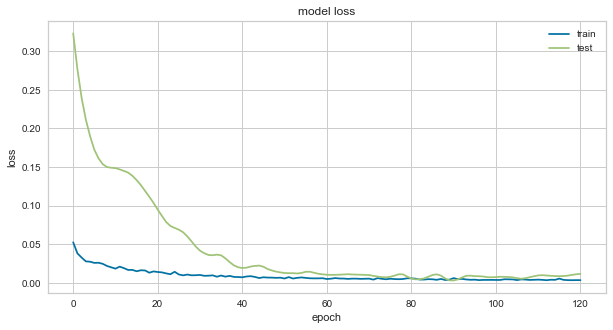

In [86]:
fig = plot_history(history)

### Plotting Predictions ( Base model )

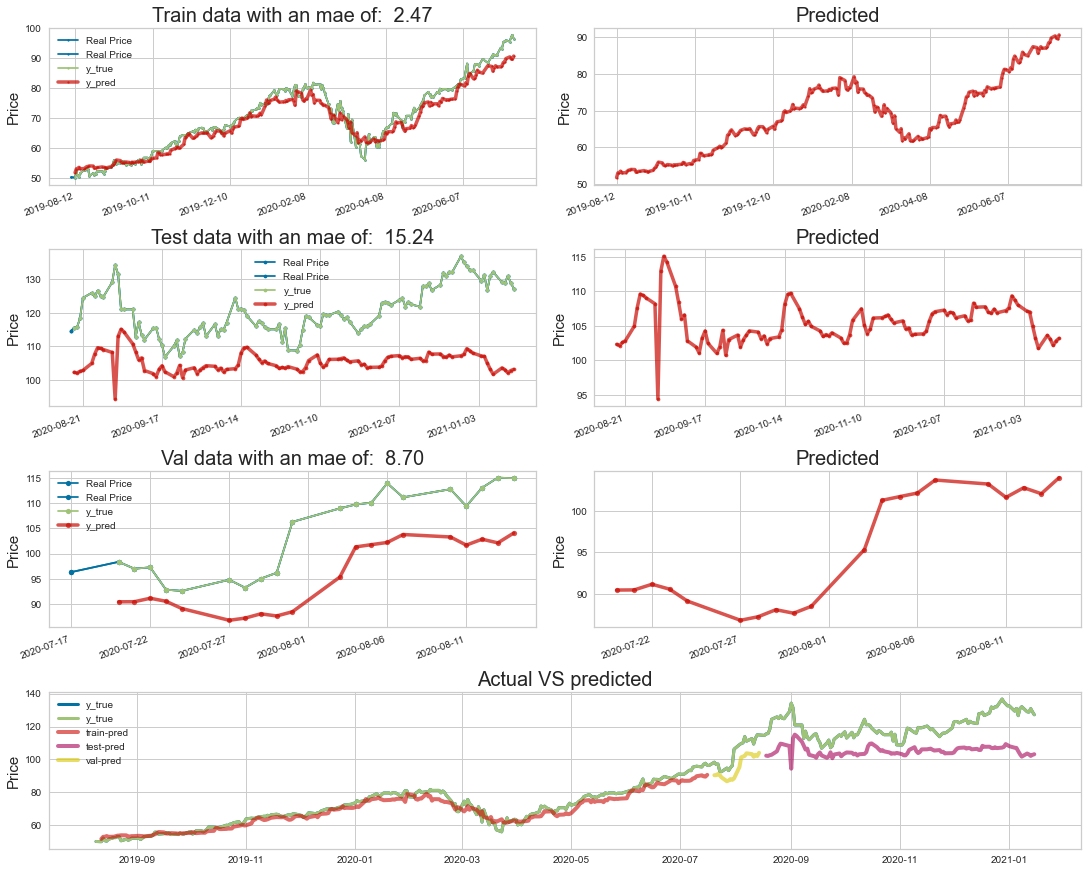

In [87]:
model_creator.predict_mean_absolute_errors()
fig = model_creator.display_mean_absolute_errors(plot=True)

In [88]:
fig.tight_layout()
fig.savefig("./bin/base_model_pred.jpg")

### Tuned model

In [89]:
# Clear last session
try:
    del tuned_model_creator.model
    K.clear_session()
    print('deleted')
except Exception:
    pass


# Define prediction columns
X_cols = [col for col in model_df.columns
          if 'AAPL' in col and 'price' not in col]
y_cols = 'AAPL_price'

# Define number of days to predict with
n_input = 1

# Instantiate loader
tuned_model_creator = NetworkCreator(model_df.copy(), X_cols, y_cols, n_input)

n_features = tuned_model_creator.X_n_features
output_features = tuned_model_creator.y_n_features

n_hidden_layers = 8

# For larger datasets that I don't have the memory to compute
# I define sufferage to divide the batch_size by
sufferage = 1

batch_size = round(n_features/sufferage)
activation = 'relu'

model = Sequential()
model.add(LSTM(batch_size,
               activation=activation,
               input_shape=(n_input, n_features),
               return_sequences=True))  # ,
               #kernel_initializer=initializers.RandomNormal(.5)))
model.add(LSTM(64, activation=activation))
model.add(Dense(64, activation='relu'))
for i in range(n_hidden_layers):
    model.add(Dense(batch_size, activation='relu'))
    #model.add(LeakyReLU(batch_size/(i+1)))
    model.add(Dropout(.01))

#model.add(Dense(2048, activation='relu'))
# model.add(Dense(1024, activation='relu'))

#model.add(Dense(n_input*3, activation='relu'))
#model.add(GaussianNoise(1))

#             output_shape is n_target_features
model.add(Dense(output_features, activation=activation,
                kernel_regularizer=l2(5)))
model.compile(loss='mse', optimizer='adam')

tuned_model_creator.model = model

# make early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=30)

# Real fit model
history = tuned_model_creator.model.fit(
    tuned_model_creator.train_data_gen,
    validation_data=tuned_model_creator.test_data_gen,
    epochs=1000, callbacks=[early_stopping],
    verbose=0)

Got 1 y columns
target is in data


### Plotting History

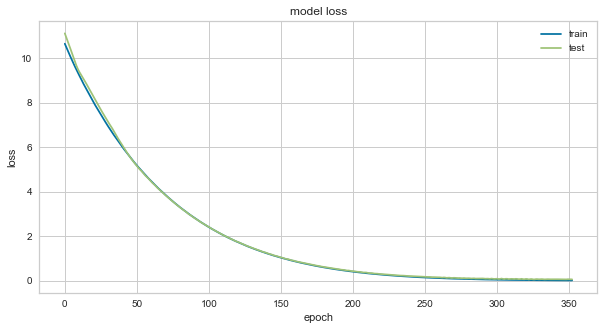

In [90]:
fig = plot_history(history)

### Plotting Predictions

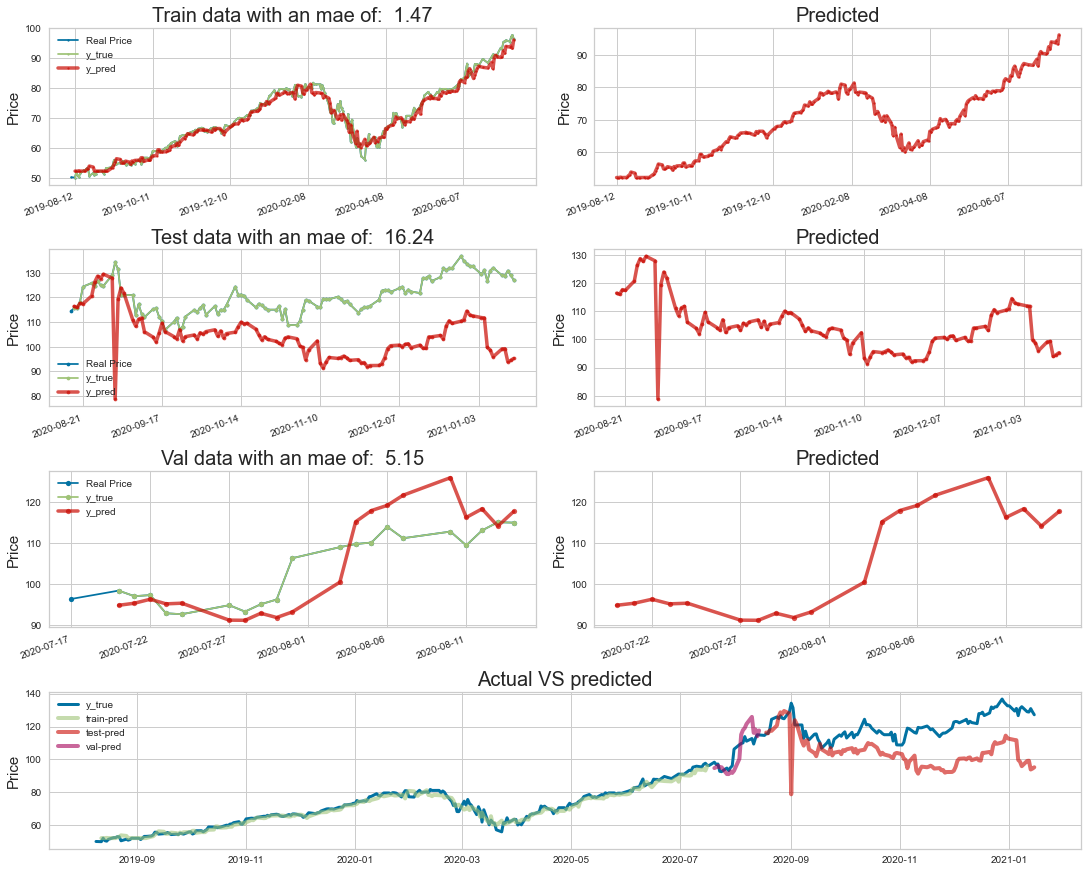

In [91]:
tuned_model_creator.predict_mean_absolute_errors()
fig = tuned_model_creator.plot_predictions()

<div class="alert alert-warning shadow">
  <strong>About the plot!</strong>
    <ul>
        <li>Much better than the base model</li>
        <li>Drop in quality of the testing data is showing through, as AAPL had a split in September of 2020</li>
    </ul>
</div>

In [92]:
fig.tight_layout()
fig.savefig("./bin/tuned_pred.jpg")

### Plotting Classification

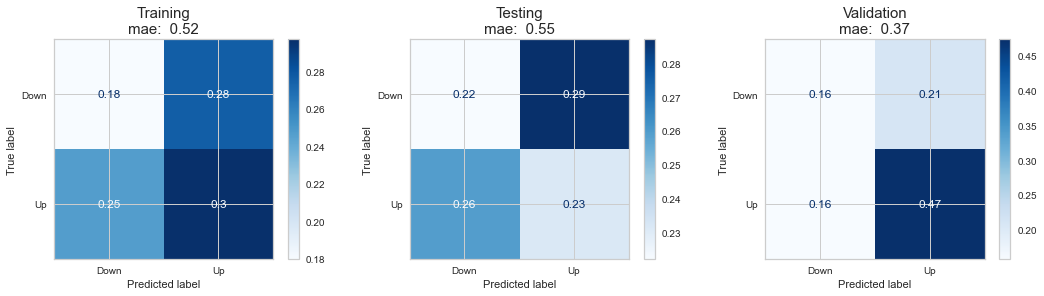

In [93]:
fig = tuned_model_creator.classify()

<div class="alert alert-warning shadow">
  <strong>About the plot!</strong>
    <ul>
        <li>We are making a regression model so the classification is not what we are tuning, but it is nice to know how well it is predicting up or down.</li>
        <li>The model looks close to a coin flip on whether it successfully predicts upward or downward movement.</li>
    </ul>
</div>

### Shap Interpretation
> Words

In [94]:
tuned_model_creator.get_shap_values()

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


#### Summary plot

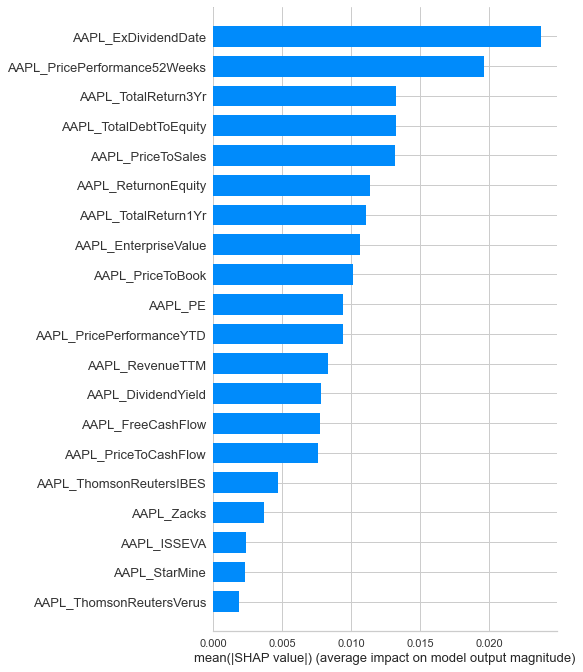

In [95]:
fig = tuned_model_creator.plot_shap_summary()

<div class="alert alert-warning shadow">
  <strong>About the plot!</strong>
    <ul>
        <li>This is showing that Total Return 3 Year is the strongest predictor</li>
        <li>Argus is the worst predictor</li>
    </ul>
</div>

#### shap_bar

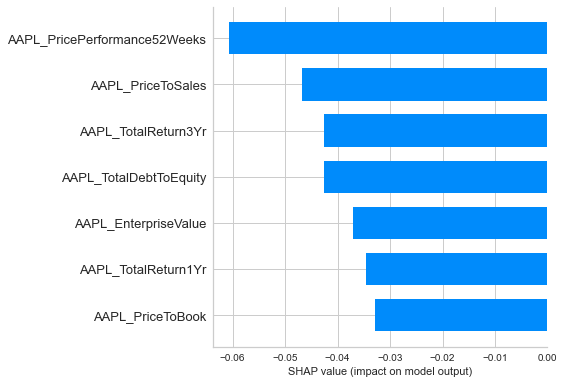

In [96]:
fig = tuned_model_creator.plot_shap_bar()

<div class="alert alert-warning shadow">
  <strong>About the plot!</strong>
    <ul>
        <li>Thomas Reuters is strongly predicting the prices downward trends, while Total Return 3Yr is predicting upward trends</li>
    </ul>
</div>

### Saving report and images

In [97]:
%%capture output
name = "aapl_price_w_aapl_info"
ret = tuned_model_creator.display_and_save_report(name)

In [98]:
#save_output(output, f'./reports/{name}')

In [99]:
print("Find the html report at")
print(os.getcwd() + f"\\reports\\{name}\\report.html")

Find the html report at
C:\Users\12147\DS\Projects\capstone-stock-analysis\reports\aapl_price_w_aapl_info\report.html


## Predicting one price with all other prices

### Base model

In [100]:
# Define prediction columns
X_cols = 'price'
y_cols = 'AAPL_price'

# Define number of days to predict with
n_days = 4

# Define parameters
base_parameters = {
    'use_input_regularizer': 0,
    'input_dropout_rate': 0.1,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.5,
    'n_hidden_layers': 1,
    'hidden_neurons': 32,
    'patience': 5,
    'use_early_stopping': 0,
    'batch_size': 32,
    'input_regularizer_penalty': 0.1,
    'hidden_regularizer_penalty': 0.3
                  }

# Instantiate loader
model_creator = NetworkCreator(model_df.copy(), X_cols, y_cols, n_days)

# Build and facade fit model with base parameters
model_creator.build_and_fit_model(**base_parameters, dummy_hp=True)

# make early stopping
early_stopping = EarlyStopping(
    monitor='loss', patience=25)

# Real fit model
history = model_creator.model.fit(
    model_creator.train_data_gen,
    validation_data=model_creator.val_data_gen,
    epochs=1000,
    callbacks=[early_stopping], verbose=0)

Got 386 X columns
Got 1 y columns
target is in data
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 386)               1193512   
_________________________________________________________________
dropout (Dropout)            (None, 386)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,205,929
Trainable params: 1,205,929
Non-trainable params: 0
_________________________________________________________________


None

### Plotting History ( Base model )

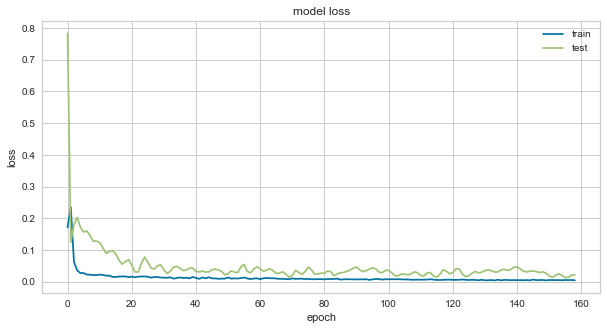

In [101]:
fig = plot_history(history)

<div class="alert alert-warning shadow">
  <strong>About the plot!</strong>
    <ul>
        <li>The testing data is scaling well to the training data</li>
        <li>We may be able to run for more epochs to improve the testing result, or that will cause overfitting the training data</li>
    </ul>
</div>

### Plotting Predictions ( Base model )

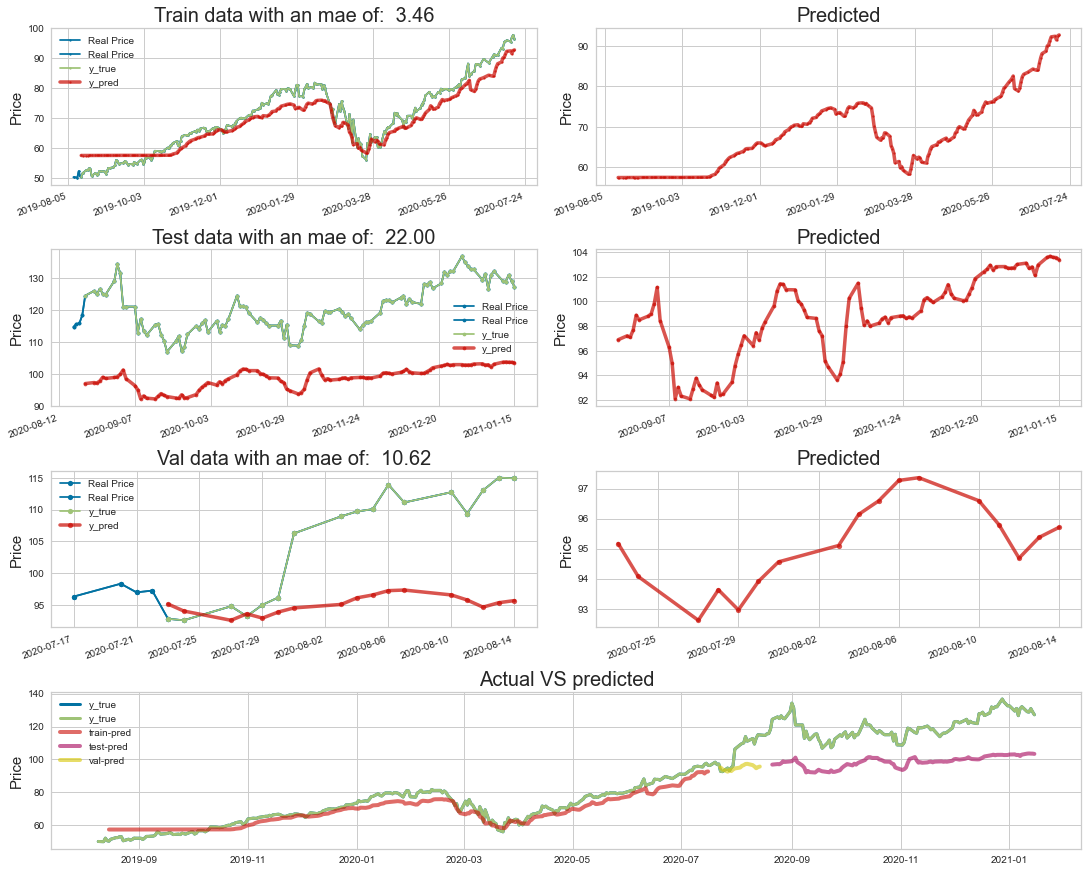

In [102]:
model_creator.predict_mean_absolute_errors()
fig = model_creator.display_mean_absolute_errors(plot=True)

### Tuned model

In [103]:
# Clear last session
try:
    del tuned_model_creator.model
    K.clear_session()
    print('deleted')
except Exception:
    pass


# Define prediction columns
X_cols = 'price'
y_cols = 'AAPL_price'

# Define number of days to predict with
n_input = 4

# Instantiate loader
tuned_model_creator = NetworkCreator(model_df.copy(), X_cols, y_cols, n_input)

n_features = tuned_model_creator.X_n_features
output_features = tuned_model_creator.y_n_features

n_hidden_layers = 2

# For larger datasets that I don't have the memory to compute
# I define sufferage to divide the batch_size by
sufferage = 1

batch_size = round(n_features/sufferage)
activation = 'relu'

model = Sequential()
model.add(LSTM(batch_size,
               activation=activation,
               input_shape=(n_input, n_features),
               return_sequences=True))  # ,
               #kernel_initializer=initializers.RandomNormal(.5)))
model.add(LSTM(64, activation=activation))
model.add(Dense(64, activation='relu'))
for i in range(n_hidden_layers):
    model.add(Dense(batch_size, activation='relu'))
    #model.add(LeakyReLU(batch_size/(i+1)))
    model.add(Dropout(.01))

model.add(Dense(2048, activation='relu'))
# model.add(Dense(1024, activation='relu'))

model.add(Dense(n_input*3, activation='relu'))
#model.add(GaussianNoise(1))

#             output_shape is n_target_features
model.add(Dense(output_features, activation=activation,
                kernel_regularizer=l2(1)))
model.compile(loss='mse', optimizer='adam')

tuned_model_creator.model = model

#make early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=100)

# Real fit model
history = tuned_model_creator.model.fit(
    tuned_model_creator.train_data_gen,
    validation_data=tuned_model_creator.test_data_gen,
    epochs=1000, callbacks=[early_stopping], verbose=0)

deleted
Got 386 X columns
Got 1 y columns
target is in data


### Plotting History

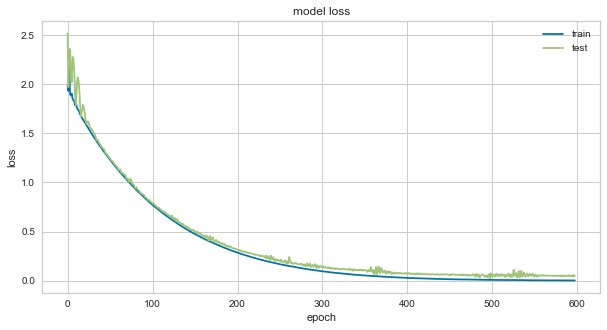

In [104]:
fig = plot_history(history)

### Plotting predictions

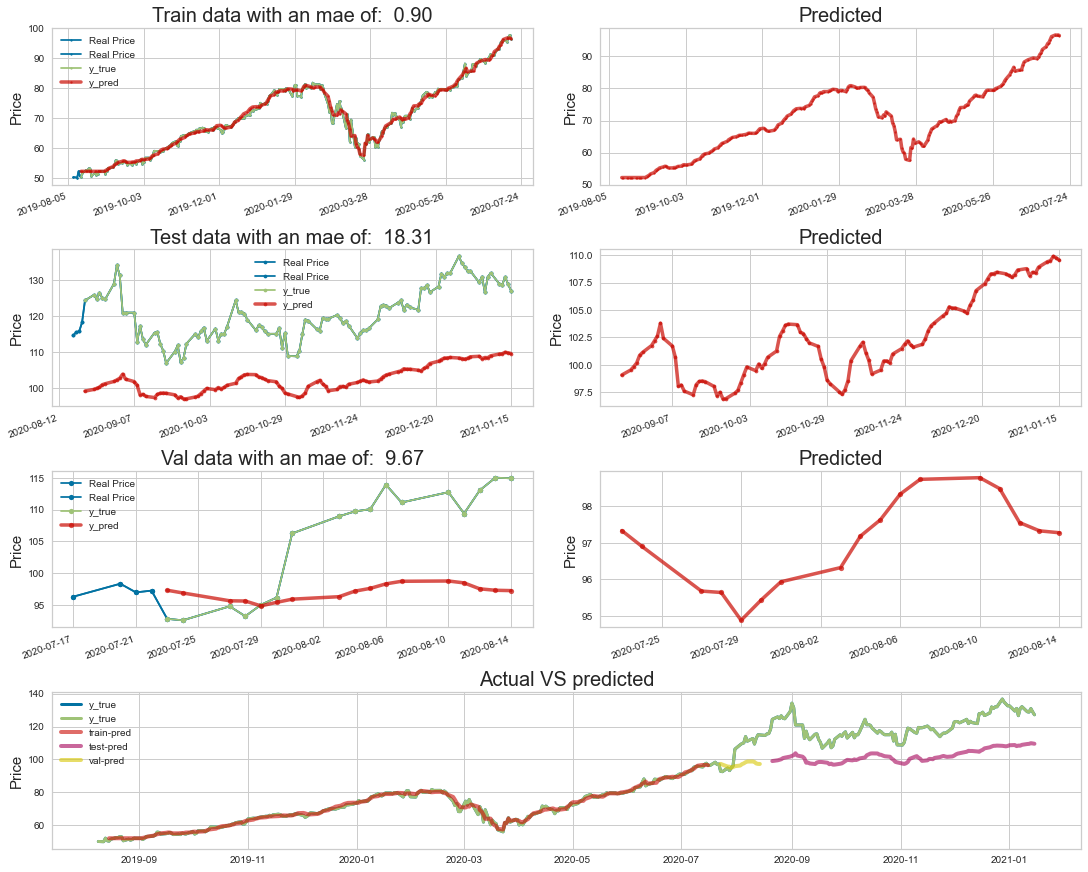

In [105]:
tuned_model_creator.predict_mean_absolute_errors()
fig = tuned_model_creator.plot_predictions()

### Classification

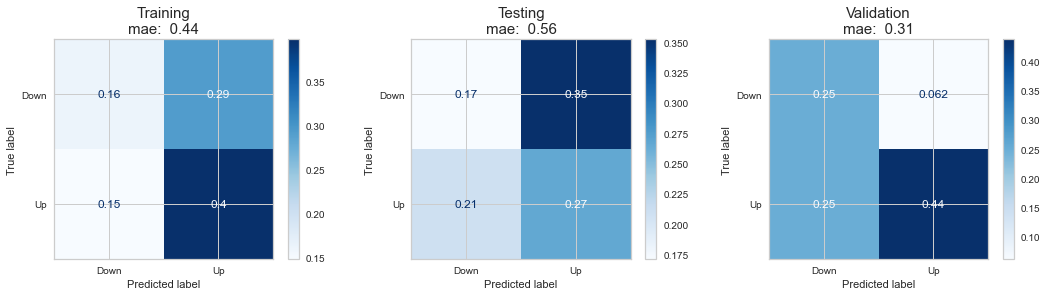

In [106]:
fig = tuned_model_creator.classify()

### Shap Interpretation
> This worked before but due to a rounding error my shap value method is not working for this day.

In [108]:
tuned_model_creator.get_shap_values()

#### Summary Importance

In [137]:
fig = tuned_model_creator.plot_shap_summary()

#### Bar Importance

In [ ]:
fig = tuned_model_creator.plot_shap_bar()

### Saving report and images

In [ ]:
%%capture output
name = "aapl_price_w_all_price"
ret = tuned_model_creator.display_and_save_report(name)

In [ ]:
#save_output(output, f'./reports/{name}')

In [ ]:
print("Find the html report at")
print(os.getcwd() + f"\\reports\\{name}\\report.html")

## Predicing one price with industry data

### CHECKPOINT

In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM, LeakyReLU
from keras import backend as K
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras import initializers
from modeling.create import NetworkCreator


model_df = pd.read_pickle("./data/modeling/model_df_cols_dropped.pkl")
company_df = pd.read_pickle("./data/company.pkl")

### Preparing the data

In [110]:
industry = company_df.loc['AAPL']['industry']

industry_syms = list(company_df.loc[company_df['industry'] == industry].index)
industry_syms

['AAPL',
 'ALOT',
 'AVID',
 'CAJ',
 'DBD',
 'HPE',
 'HPQ',
 'LOGI',
 'NCR',
 'NTAP',
 'PMTS',
 'PSTG',
 'SSYS',
 'STX',
 'TACT',
 'WDC',
 'XRX']

In [111]:
slice_cols = [col for col in model_df.columns if col.split('_')[0] in industry_syms]
industry_df = model_df[slice_cols].copy()
industry_df.shape, model_df.shape

((372, 105), (372, 5790))

### Base model

In [112]:
# Define prediction columns
X_cols = list(industry_df.columns)
y_cols = 'AAPL_price'

# Define number of days to predict with
n_days = 4

# Define parameters
base_parameters = {
    'use_input_regularizer': 0,
    'input_dropout_rate': 0.1,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.5,
    'n_hidden_layers': 1,
    'hidden_neurons': 32,
    'patience': 5,
    'use_early_stopping': 0,
    'batch_size': 32,
    'input_regularizer_penalty': 0.1,
    'hidden_regularizer_penalty': 0.3
                  }

# Instantiate loader
model_creator = NetworkCreator(industry_df.copy(), X_cols, y_cols, n_days)

# Build and facade fit model with base parameters
model_creator.build_and_fit_model(**base_parameters, dummy_hp=True)

# make early stopping
early_stopping = EarlyStopping(
    monitor='loss', patience=25)

# Real fit model
history = model_creator.model.fit(
    model_creator.train_data_gen,
    validation_data=model_creator.val_data_gen,
    epochs=1000,
    callbacks=[early_stopping], verbose=0)

Got 1 y columns
target is in data
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105)               88620     
_________________________________________________________________
dropout (Dropout)            (None, 105)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                3392      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 92,045
Trainable params: 92,045
Non-trainable params: 0
_________________________________________________________________


None

In [113]:
import copy
histories = []
for i in range(3):
    histories.append(copy.copy(history.history))

In [114]:
df = pd.DataFrame(histories)
loss = np.array(df['loss'].sum()) / len(df)
val_loss = np.array(df['val_loss'].sum()) / len(df)


### Plotting History ( Base model )

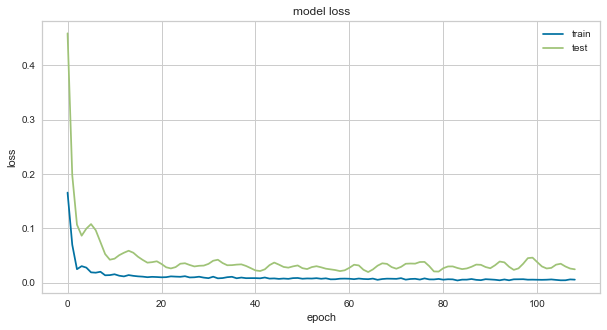

In [115]:
fig = plot_history(history)

### Plotting Predictions ( Base model )

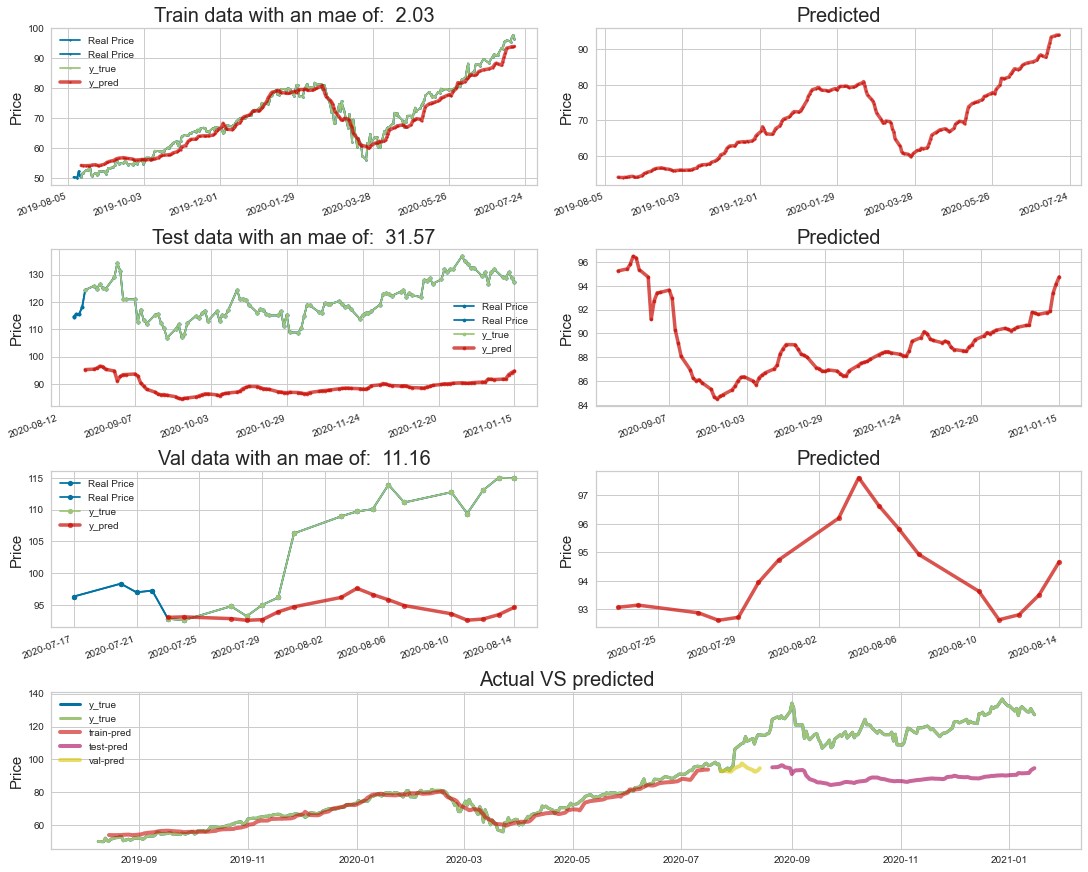

In [116]:
model_creator.predict_mean_absolute_errors()
fig = model_creator.display_mean_absolute_errors(plot=True)

### Tuned model

In [117]:
# Clear last session
try:
    del tuned_model_creator.model
    K.clear_session()
    print('deleted')
except Exception:
    pass


# Define prediction columns
X_cols = list(industry_df.columns)
y_cols = 'AAPL_price'

# Define number of days to predict with
n_input = 1

# Instantiate loader
tuned_model_creator = NetworkCreator(industry_df.copy(), X_cols, y_cols, n_input)

n_features = tuned_model_creator.X_n_features
output_features = tuned_model_creator.y_n_features

n_hidden_layers = 2

# For larger datasets that I don't have the memory to compute
# I define sufferage to divide the batch_size by
sufferage = 1

batch_size = round(n_features/sufferage)
activation = 'relu'

model = Sequential()
model.add(LSTM(batch_size,
               activation=activation,
               input_shape=(n_input, n_features),
               return_sequences=True))  # ,
               #kernel_initializer=initializers.RandomNormal(.5)))
model.add(LSTM(64, activation=activation))
model.add(Dense(64, activation='relu'))
for i in range(n_hidden_layers):
    #model.add(Dense(batch_size, activation='relu'))
    model.add(LeakyReLU(batch_size/(i+1)))
    model.add(Dropout(.01))

#model.add(Dense(2048, activation='relu'))
#model.add(Dense(1024, activation='relu'))

model.add(Dense(n_input*3, activation='relu'))
#model.add(GaussianNoise(1))

#             output_shape is n_target_features
model.add(Dense(output_features, activation=activation,
                kernel_regularizer=l2(5)))
model.compile(loss='mse', optimizer='adam')

tuned_model_creator.model = model

#make early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=100)

# Real fit model
history = tuned_model_creator.model.fit(
    tuned_model_creator.train_data_gen,
    validation_data=tuned_model_creator.test_data_gen,
    epochs=1500, verbose=0)#, callbacks=[early_stopping], verbose=0)

deleted
Got 1 y columns
target is in data


### Plotting History

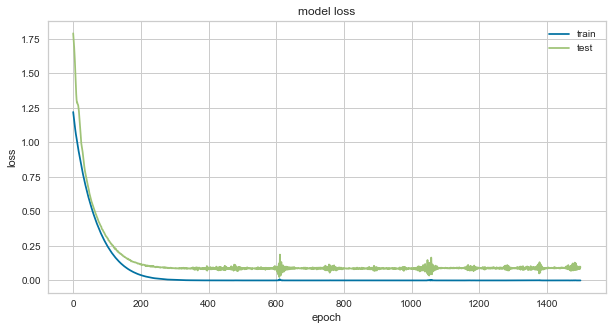

In [118]:
fig = plot_history(history)

### Plotting predictions

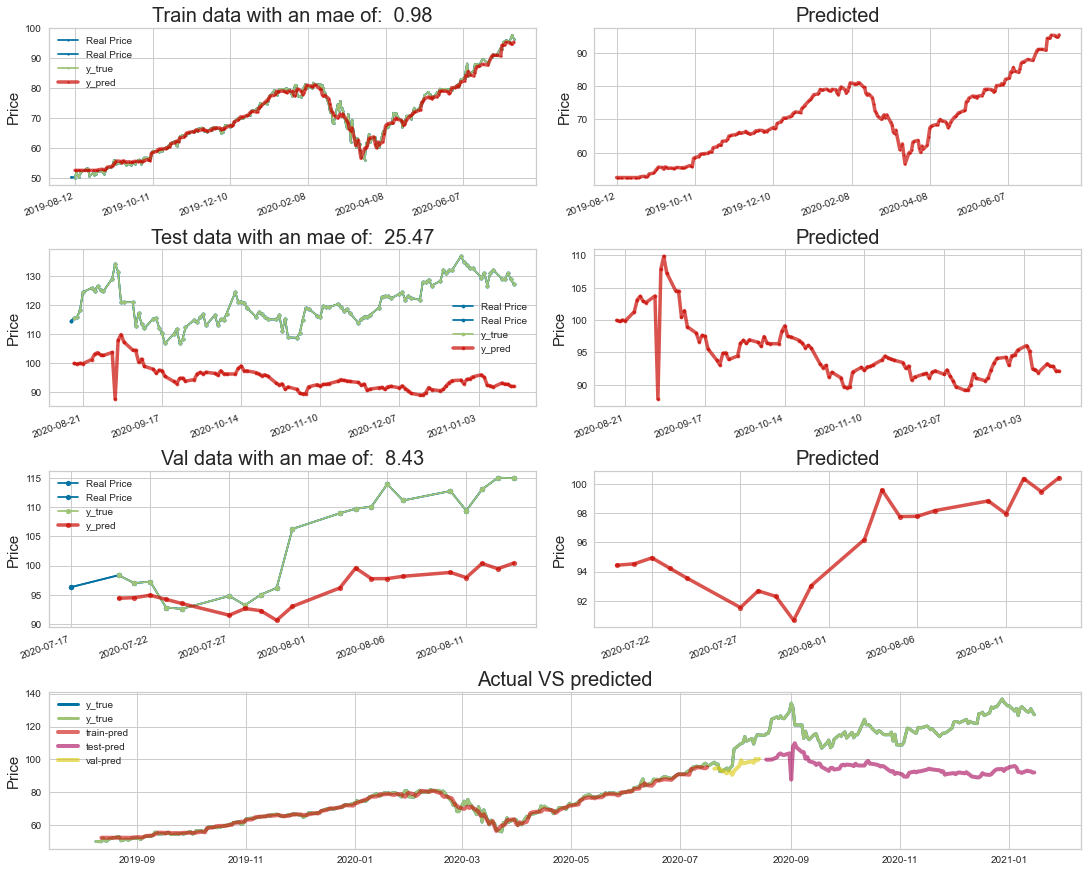

In [119]:
tuned_model_creator.predict_mean_absolute_errors()
fig = tuned_model_creator.plot_predictions()

### Classification

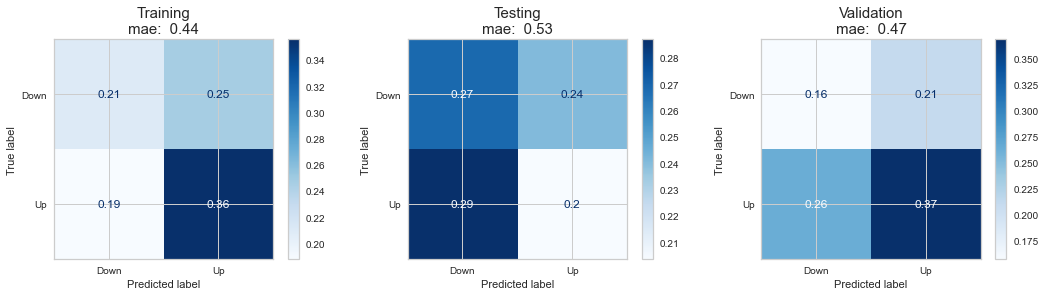

In [120]:
fig = tuned_model_creator.classify()

### Shap Interpretation

In [121]:
tuned_model_creator.get_shap_values()

#### Summary Importance

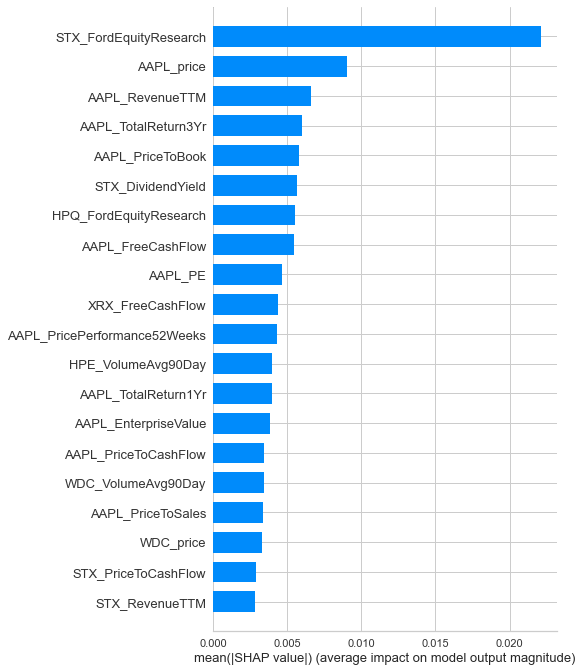

In [122]:
fig = tuned_model_creator.plot_shap_summary()

#### Bar Importance

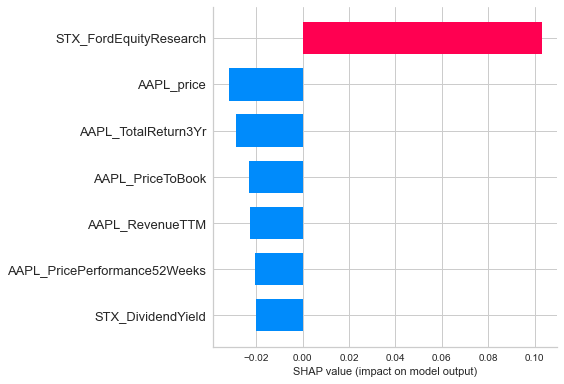

In [123]:
fig = tuned_model_creator.plot_shap_bar()

### Saving report and images

In [124]:
%%capture output
name = "aapl_price_w_sector"
ret = tuned_model_creator.display_and_save_report(name)

In [125]:
#save_output(output, f'./reports/{name}')

In [126]:
print("Find the html report at")
print(os.getcwd() + f"\\reports\\{name}\\report.html")

Find the html report at
C:\Users\12147\DS\Projects\capstone-stock-analysis\reports\aapl_price_w_sector\report.html


# Forecasting
> For forecasting stock prices you don't have to know what the price will be 30 days from now for day trading only 2 days from now.  We will be training two models, one model to predict all AAPL sector prices tomorrow, and another to predict all AAPL sector prices day after tomorrow.  We can forecast the next two days in the future by simple feeding the last row into both models.  to do this we will:
> * Train one model on predicting simply tomorrow
> * duplicate the targets
> * shift the duplicated targets back by one
> * feed the data and both targets into the **NetworkCreator** with the shifted data now being listed as the target.  This model will be learning on what the price is day after tomorrow ( relative )

## Forecasting tomorrow
> Building a model to simply forecast what the sector's prices will be tomorrow

### CHECKPOINT

In [127]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from modeling.tuner import NetworkTuner
from modeling.create import NetworkCreator

model_df = pd.read_pickle("./data/modeling/model_df_cols_dropped.pkl")
company_df = pd.read_pickle("./data/company.pkl")
industry = company_df.loc['AAPL']['industry']
industry_syms = list(company_df.loc[
                     company_df['industry'] == industry].index)
slice_cols = [col for col in model_df.columns
              if col.split('_')[0] in industry_syms]
industry_df = model_df[slice_cols].copy()

X_cols = list(industry_df.columns)
y_cols = 'price'

### Base model

In [128]:
creator = NetworkCreator(
        n_days=1, df=industry_df, X_cols=X_cols,
        y_cols=y_cols
    )
creator.build_and_fit_model(dummy_hp=True)

# make early stopping
early_stopping = EarlyStopping(
    monitor='loss', patience=25)

# Real fit model
history = creator.model.fit(
    creator.train_data_gen,
    validation_data=creator.val_data_gen,
    epochs=1000,
    callbacks=[early_stopping], verbose=0)

Got 7 y columns
targets are in x
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105)               88620     
_________________________________________________________________
dense (Dense)                (None, 64)                6784      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 95,859
Trainable params: 95,859
Non-trainable params: 0
_________________________________________________________________


None

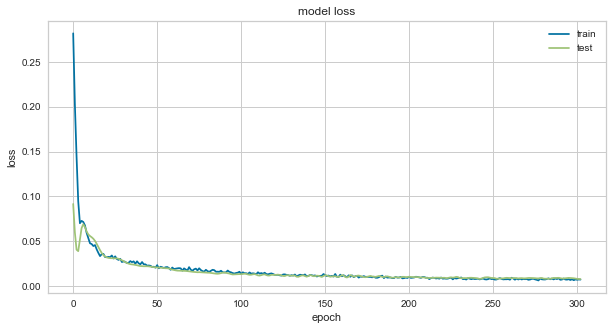

In [129]:
fig = plot_history(history)

In [130]:
creator.predict_mean_absolute_errors()
fig = creator.display_mean_absolute_errors()

-------------------- 
mean_absolute_errors
--------------------
Training:1.00
Testing:6.82
Validation:2.69


<div class="alert alert-info shadow">
  <strong>Auto Tuning</strong> Here and on the next auto-tuned network we use our auto tuning process with our NetworkTuner that implements:
    <ul>
        <li>K-fold cross validation</li>
        <li>A custom sequential model</li>
        <li>kerastuner hyperband</li>
        <li>ability to tune things such as
            <ul>
                <li>Number of days predicting with</li>
                <li>Whether to add gaussian noise</li>
                <li>How many hidden layers</li>
                <li>Parameters in the hidden layers</li>
                <li>Parameters in the input layer</li>
                <li>Parameters in the compile</li>
                <li>Parameters in the fit</li>
            </ul>
        </li>
    </ul>
    Our process takes roughly 5 hours to tune one network based on the following hyper-parameters similar to a scikit-learn GridSearchCV:
    
```python
parameters = {
    'input_dropout_rate': [.1, .3, .5],
    'use_input_regularizer': [0, 1, 2],
    'input_regularizer_penalty': [0.01, 0.1],  # , 0.01, 0.05, 0.1
    'add_hidden_lstm': [0, 1],
    'hidden_lstm_neurons': [32, 64],
    'add_gaussian_noise': [0, 1],
    'gaussian_noise_quotient': [.5, 1.0, 3.0],
    'n_hidden_layers': [1, 2, 4],
    'hidden_dropout_rate': [0.0, .05, .1],  # , .3, .5, .9],
    'hidden_neurons': [64, 128, batch_size],
    'use_hidden_regularizer': [0, 1, 2],
    'hidden_regularizer_penalty': [0.001, 0.01],  # , 0.05, 0.1, 0.3],
    'patience': [0],  # [5, 25, 50, 100],
    'batch_size': [64, 128, batch_size],
    'use_early_stopping': [0],  # [0, 1]
    'n_days': [3, 4, 5],  # be sure to change max parameter
    'optimizer': ['adam', 'rmsprop']
}
```
    
</div>

### Auto-Tuned model

#### Parameters
```python
parameters = {
    'n_days': 3,
    'add_hidden_lstm': 1,
    'use_input_regularizer': 0,
    'input_dropout_rate': 0.1,
    'add_gaussian_noise': 0,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.0,
    'n_hidden_layers': 1,
    'hidden_neurons': 64,
    'optimizer': 'rmsprop',
    'patience': 0,
    'use_early_stopping': 0,
    'batch_size': 64,
    'gaussian_noise_quotient': 1.0,
    'input_regularizer_penalty': 0.01,
    'hidden_lstm_neurons': 64,
    'hidden_regularizer_penalty': 0.1}
```

In [131]:
creator = NetworkCreator(
        df=industry_df, X_cols=X_cols,
        y_cols=y_cols, n_days=3  # parameters['n_days']
    )

parameters = creator.load_parameters('aapl_industry')

Got 7 y columns
targets are in x
INFO:tensorflow:Reloading Oracle from existing project ./tuner_directory\aapl_industry\oracle.json
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105)               88620     
_________________________________________________________________
dense (Dense)                (None, 64)                6784      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 95,859
Trainable params: 95,859
Non-trainable params: 0
_________________________________________________________________


None

INFO:tensorflow:Reloading Tuner from ./tuner_directory\aapl_industry\tuner0.json
Getting top hyper-parameters for: aapl_industry
removed tuner_parameters
 {'tuner/epochs': 25, 'tuner/initial_epoch': 9, 'tuner/bracket': 6, 'tuner/round': 2, 'tuner/trial_id': '6e083690b521ca4704b7956f45843230'}


In [132]:
creator.build_and_fit_model(**parameters)

# make early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=50)

history = creator.model.fit(
    creator.train_data_gen,
    validation_data=creator.val_data_gen,
    callbacks=[early_stopping],
    epochs=2000, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 105)            88620     
_________________________________________________________________
dropout (Dropout)            (None, 3, 105)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                43520     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 136,755
Trainable params: 136,755
Non-trainable params: 0
_________________________________________________________________


None

### Interpretation

#### history

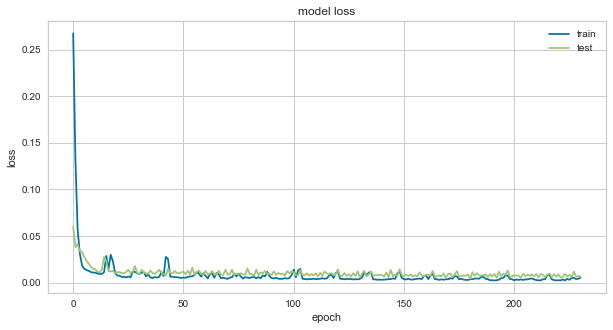

In [133]:
fig = plot_history(history)

#### score

In [134]:
creator.predict_mean_absolute_errors()
fig = creator.display_mean_absolute_errors()

-------------------- 
mean_absolute_errors
--------------------
Training:1.20
Testing:7.61
Validation:2.62


### Saving model

In [135]:
creator.model.save("./data/models/aapl_sector_1st_day.h5")

## Forecasting day after tomorrow
> Building a model to forecast what the sector's prices will be day after tomorrow

### CHECKPOINT

In [136]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from modeling.tuner import NetworkTuner
from modeling.create import NetworkCreator

model_df = pd.read_pickle("./data/modeling/model_df_cols_dropped.pkl")
company_df = pd.read_pickle("./data/company.pkl")
industry = company_df.loc['AAPL']['industry']
industry_syms = list(company_df.loc[
                     company_df['industry'] == industry].index)
slice_cols = [col for col in model_df.columns
              if col.split('_')[0] in industry_syms]
industry_df = model_df[slice_cols].copy()

X_cols = list(industry_df.columns)
y_cols = 'price'

target_columns = [col for col in industry_df.columns if 'price' in col]

shifted_targets = industry_df[target_columns].shift(1)

industry_df[target_columns] = shifted_targets
industry_df.dropna(inplace=True)

In [137]:
target_columns

['AAPL_price',
 'HPE_price',
 'HPQ_price',
 'NTAP_price',
 'STX_price',
 'WDC_price',
 'XRX_price']

In [138]:
shifted_targets.head()

AAPL_price  HPE_price  HPQ_price  NTAP_price  STX_price  \
date                                                                  
2019-08-09         nan        nan        nan         nan        nan   
2019-08-12      50.235     13.390     19.280      46.590     44.890   
2019-08-13      50.120     13.070     18.945      46.110     44.820   
2019-08-14      52.242     13.400     19.540      46.990     45.830   
2019-08-15      50.688     12.860     19.280      44.760     44.640   

            WDC_price  XRX_price  
date                              
2019-08-09        nan        nan  
2019-08-12     54.250     28.200  
2019-08-13     54.170     28.090  
2019-08-14     55.600     28.350  
2019-08-15     54.450     27.580

In [139]:
model_df[target_columns].tail()

AAPL_price  HPE_price  HPQ_price  NTAP_price  STX_price  \
date                                                                  
2021-01-11     128.980     11.970     25.780      65.220     58.720   
2021-01-12     128.800     12.140     25.910      66.160     59.030   
2021-01-13     130.890     12.170     25.710      65.200     59.900   
2021-01-14     128.910     12.480     25.620      65.840     59.955   
2021-01-15     127.140     12.540     25.170      64.660     60.510   

            WDC_price  XRX_price  
date                              
2021-01-11     51.560     23.440  
2021-01-12     49.900     23.220  
2021-01-13     49.470     22.940  
2021-01-14     50.370     23.040  
2021-01-15     51.210     22.490

In [140]:
shifted_targets.tail()

AAPL_price  HPE_price  HPQ_price  NTAP_price  STX_price  \
date                                                                  
2021-01-11     132.050     11.880     25.530      64.970     59.000   
2021-01-12     128.980     11.970     25.780      65.220     58.720   
2021-01-13     128.800     12.140     25.910      66.160     59.030   
2021-01-14     130.890     12.170     25.710      65.200     59.900   
2021-01-15     128.910     12.480     25.620      65.840     59.955   

            WDC_price  XRX_price  
date                              
2021-01-11     51.810     23.550  
2021-01-12     51.560     23.440  
2021-01-13     49.900     23.220  
2021-01-14     49.470     22.940  
2021-01-15     50.370     23.040

### Base model

In [141]:
creator = NetworkCreator(
        n_days=1, df=industry_df, X_cols=X_cols,
        y_cols=y_cols
    )
creator.build_and_fit_model(dummy_hp=True)

# make early stopping
early_stopping = EarlyStopping(
    monitor='loss', patience=25)

# Real fit model
history = creator.model.fit(
    creator.train_data_gen,
    validation_data=creator.val_data_gen,
    epochs=1000,
    callbacks=[early_stopping], verbose=0)

Got 7 y columns
targets are in x
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105)               88620     
_________________________________________________________________
dense (Dense)                (None, 64)                6784      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 95,859
Trainable params: 95,859
Non-trainable params: 0
_________________________________________________________________


None

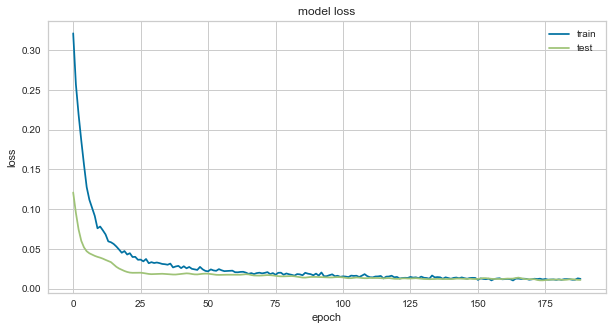

In [142]:
fig = plot_history(history)

In [143]:
creator.predict_mean_absolute_errors()
fig = creator.display_mean_absolute_errors()

-------------------- 
mean_absolute_errors
--------------------
Training:1.08
Testing:6.78
Validation:3.49


### Auto-Tuned model

#### Parameters
```python
parameters = {
    'n_days': 3,
    'add_hidden_lstm': 0,
    'use_input_regularizer': 0,
    'input_dropout_rate': 0.3,
    'add_gaussian_noise': 0,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.1,
    'n_hidden_layers': 1,
    'hidden_neurons': 32,
    'optimizer': 'adam',
    'patience': 0,
    'use_early_stopping': 0,
    'batch_size': 64,
    'gaussian_noise_quotient': 3.0,
    'input_regularizer_penalty': 0.01,
    'hidden_regularizer_penalty': 0.01,
    'hidden_lstm_neurons': 64}
```

In [144]:
creator = NetworkCreator(
        df=industry_df, X_cols=X_cols,
        y_cols=y_cols, n_days=3  # parameters['n_days']
    )

parameters = creator.load_parameters('aapl_industry_2nd_day')

Got 7 y columns
targets are in x
INFO:tensorflow:Reloading Oracle from existing project ./tuner_directory\aapl_industry_2nd_day\oracle.json
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105)               88620     
_________________________________________________________________
dense (Dense)                (None, 64)                6784      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 95,859
Trainable params: 95,859
Non-trainable params: 0
_________________________________________________________________


None

INFO:tensorflow:Reloading Tuner from ./tuner_directory\aapl_industry_2nd_day\tuner0.json
Getting top hyper-parameters for: aapl_industry_2nd_day
removed tuner_parameters
 {'tuner/epochs': 25, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}


In [145]:
creator.build_and_fit_model(**parameters)

# make early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=50)

history = creator.model.fit(
    creator.train_data_gen,
    validation_data=creator.val_data_gen,
    callbacks=[early_stopping],
    epochs=2000, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 105)            88620     
_________________________________________________________________
dropout (Dropout)            (None, 3, 105)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17664     
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

None

### Interpretation

#### history

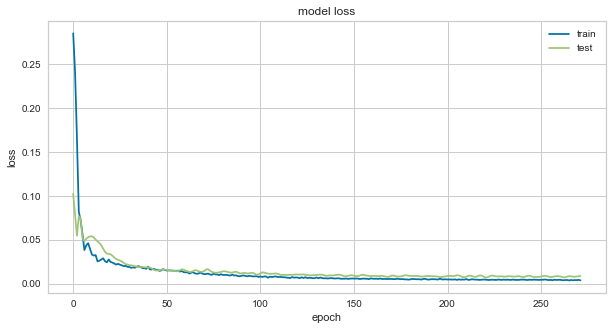

In [146]:
fig = plot_history(history)

#### score

In [147]:
creator.predict_mean_absolute_errors()
fig = creator.display_mean_absolute_errors()

-------------------- 
mean_absolute_errors
--------------------
Training:1.10
Testing:8.10
Validation:3.04


### Saving model

In [148]:
creator.model.save("./data/models/aapl_sector_2nd_day.h5")

## Combined forecast
> Retraining both models on all data

In [149]:
import tensorflow as tf

### one_day

In [150]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from modeling.tuner import NetworkTuner
from modeling.create import NetworkCreator

model_df = pd.read_pickle("./data/modeling/model_df_cols_dropped.pkl")
company_df = pd.read_pickle("./data/company.pkl")
industry = company_df.loc['AAPL']['industry']
industry_syms = list(company_df.loc[
                     company_df['industry'] == industry].index)
slice_cols = [col for col in model_df.columns
              if col.split('_')[0] in industry_syms]
industry_df = model_df[slice_cols].copy()

X_cols = list(industry_df.columns)
y_cols = 'price'

# model_1 = tf.keras.models.load_model("./data/models/aapl_sector_1st_day.h5")

In [151]:
creator_1 = NetworkCreator(
        n_days=3, df=industry_df, X_cols=X_cols,
        y_cols=y_cols, tuning=True
    )
creator_1.build_and_fit_model(dummy_hp=True)

# creator_1.model = model_1

# Real fit model
history = creator_1.model.fit(
    creator_1.data_gen,
    epochs=2000 , verbose=0)

Got 7 y columns
targets are in x
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105)               88620     
_________________________________________________________________
dense (Dense)                (None, 64)                6784      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 95,859
Trainable params: 95,859
Non-trainable params: 0
_________________________________________________________________


None

### two_day

In [152]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from modeling.tuner import NetworkTuner
from modeling.create import NetworkCreator

model_df = pd.read_pickle("./data/modeling/model_df_cols_dropped.pkl")
company_df = pd.read_pickle("./data/company.pkl")
industry = company_df.loc['AAPL']['industry']
industry_syms = list(company_df.loc[
                     company_df['industry'] == industry].index)
slice_cols = [col for col in model_df.columns
              if col.split('_')[0] in industry_syms]
industry_df = model_df[slice_cols].copy()

X_cols = list(industry_df.columns)
y_cols = 'price'

target_columns = [col for col in industry_df.columns if 'price' in col]

shifted_targets = industry_df[target_columns].shift(1)

industry_df[target_columns] = shifted_targets
industry_df.dropna(inplace=True)

# model_2 = tf.keras.models.load_model("./data/models/aapl_sector_2nd_day.h5")

In [153]:
creator_2 = NetworkCreator(
        n_days=3, df=industry_df, X_cols=X_cols,
        y_cols=y_cols, tuning=True
    )
creator_2.build_and_fit_model(dummy_hp=True)

# creator_2.model = model_2

# Real fit model
history = creator_2.model.fit(
    creator_2.data_gen,
    epochs=2000 , verbose=0)

Got 7 y columns
targets are in x
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105)               88620     
_________________________________________________________________
dense (Dense)                (None, 64)                6784      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 95,859
Trainable params: 95,859
Non-trainable params: 0
_________________________________________________________________


None

## Forecast

### 1st day

In [154]:
n_days = 3
pred_1 = creator_1.model.predict(creator_1.data_gen.data[-4:-1].reshape(1, n_days, 105))
pred_1_iv = creator_1.y_scaler.inverse_transform(pred_1)
pred_1_df = pd.DataFrame(pred_1_iv, columns=creator_1.y_cols,
                        index=[creator_1.df.index[-1] + pd.DateOffset(1)])
pred_1_df

AAPL_price  HPE_price  HPQ_price  NTAP_price  STX_price  \
2021-01-16     128.996     12.194     24.877      65.275     61.108   

            WDC_price  XRX_price  
2021-01-16     50.878     23.547

### 2nd day

In [155]:
n_days = 3
pred_2 = creator_2.model.predict(creator_2.data_gen.data[-4:-1].reshape(1, n_days, 105))
pred_2_iv = creator_2.y_scaler.inverse_transform(pred_2)
pred_2_df = pd.DataFrame(pred_2_iv, columns=creator_2.y_cols,
                        index=[creator_2.df.index[-1] + pd.DateOffset(2)])
pred_2_df

AAPL_price  HPE_price  HPQ_price  NTAP_price  STX_price  \
2021-01-17     128.889     12.274     25.127      65.187     60.567   

            WDC_price  XRX_price  
2021-01-17     50.707     23.540

### Combined

#### Get today

In [156]:
today = creator_1.X_scaler.transform(creator_1.df)
today = creator_1.X_scaler.inverse_transform(today)
today = pd.DataFrame(today, columns=creator_1.X_cols)
today = today[target_columns].iloc[[-1]]

idx = creator_1.df.iloc[[-1]].index
today.index = idx
today

AAPL_price  HPE_price  HPQ_price  NTAP_price  STX_price  \
date                                                                  
2021-01-15     127.140     12.540     25.170      64.660     60.510   

            WDC_price  XRX_price  
date                              
2021-01-15     51.210     22.490

In [157]:
pred = pd.concat([today, pred_1_df, pred_2_df])
pred.transpose()

2021-01-15  2021-01-16  2021-01-17
AAPL_price     127.140     128.996     128.889
HPE_price       12.540      12.194      12.274
HPQ_price       25.170      24.877      25.127
NTAP_price      64.660      65.275      65.187
STX_price       60.510      61.108      60.567
WDC_price       51.210      50.878      50.707
XRX_price       22.490      23.547      23.540

> Other than apple the predictions don't seem far too off, we'll have to wait and see, although the markets are closed on the 24th

# Conclusion

> **Future:**
> * Cluster on absolute correlation?  take.corr for different symbols
> * iteratively add columns,  start with only predicting future price of one stock with all the prices previously of other stocks
> * Try w/ without differencing
> * Forecasting tomorrow's prices with combined models
> * Tuning model parameters on different n_days and different features
> * Predict 2 days ahead

#### Final word
> Building an LSTM network is not a walk in the park.  You have to imagine how the data is interacting with itself, and how the network could best predict with said data.  You also have to figure out exactly how the data needs to be shaped, and how the network should read in the data.  I'll leave you with a few recommendations I devised from my project.
> - Changes in PE and PriceToSales have the greatest effect on tomorrow’s price.  So if PE is up I would recommend buying that stock.
> - Our number one limitation for predicting the data was GPU RAM.  We ran into out of memory errors quickly if we tried predicting on all of the data.  I recommend exploring big data machine learning options to reduce that limitation.
> - The best array of networks for predicting stock data we found was training a network for each of the x days of data you want to predict into the future.   I recommend exploring different methods for creating a network, and thinking outside of the box.
